## Melbourne House Price Analysis & Prediction

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#settings:

sns.set_style('whitegrid') # setting plot style

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width',500)
pd.set_option('display.max_colwidth',500)

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
# Displaying first five records of datset
df.head()

Suburb             Address  Rooms Type      Price Method SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude             Regionname  Propertycount
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis  3/09/2016       2.5    3067.0       2.0       1.0  1.0     126.0           NaN        NaN  Yarra City Council   -37.8014    144.9958  Northern Metropolitan         4019.0
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0           NaN        NaN  Yarra City Council   -37.7996    144.9984  Northern Metropolitan         4019.0
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0          79.0     1900.0  Yarra City Council   -37.8079    144.9934  Northern Metropolitan         4019.0
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds  4/02/2016       2.5    3067.0       3.0       2.0  1.0       0.0           NaN        NaN  Yarra City Council   -37.8114    145.0116  Northern Metropolitan         4019.0
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0         150.0     1900.0  Yarra City Council   -37.8093    144.9944  Northern Metropolitan         4019.0

**Studying Column Information**

In [4]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'], dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
df.head()

Suburb             Address  Rooms Type      Price Method SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude             Regionname  Propertycount
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis  3/09/2016       2.5    3067.0       2.0       1.0  1.0     126.0           NaN        NaN  Yarra City Council   -37.8014    144.9958  Northern Metropolitan         4019.0
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0           NaN        NaN  Yarra City Council   -37.7996    144.9984  Northern Metropolitan         4019.0
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0          79.0     1900.0  Yarra City Council   -37.8079    144.9934  Northern Metropolitan         4019.0
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds  4/02/2016       2.5    3067.0       3.0       2.0  1.0       0.0           NaN        NaN  Yarra City Council   -37.8114    145.0116  Northern Metropolitan         4019.0
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0         150.0     1900.0  Yarra City Council   -37.8093    144.9944  Northern Metropolitan         4019.0

In [6]:
Headers = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 
 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']
print(Headers)

['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


**Dealing with spellings:**

In [7]:
Headers = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 
 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longitude', 'RegionName', 'PropertyCount']
df.columns = Headers
df.head()

Suburb             Address  Rooms Type      Price Method SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt         CouncilArea  Latitude  Longitude             RegionName  PropertyCount
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis  3/09/2016       2.5    3067.0       2.0       1.0  1.0     126.0           NaN        NaN  Yarra City Council  -37.8014   144.9958  Northern Metropolitan         4019.0
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0           NaN        NaN  Yarra City Council  -37.7996   144.9984  Northern Metropolitan         4019.0
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0          79.0     1900.0  Yarra City Council  -37.8079   144.9934  Northern Metropolitan         4019.0
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds  4/02/2016       2.5    3067.0       3.0       2.0  1.0       0.0           NaN        NaN  Yarra City Council  -37.8114   145.0116  Northern Metropolitan         4019.0
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0         150.0     1900.0  Yarra City Council  -37.8093   144.9944  Northern Metropolitan         4019.0

**Exploring the Data**

In [8]:
# Displaying number of rows and columns

df.shape

(34857, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Latitude       26881 non-null  float64
 18  Longit

**Forming Statistical Summary of the Data**

In [10]:
df.describe(include='all')

Suburb       Address         Rooms   Type         Price Method SellerG        Date      Distance      Postcode      Bedroom2      Bathroom           Car       Landsize  BuildingArea     YearBuilt              CouncilArea      Latitude     Longitude             RegionName  PropertyCount
count       34857         34857  34857.000000  34857  2.724700e+04  34857   34857       34857  34856.000000  34856.000000  26640.000000  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000                    34854  26881.000000  26881.000000                  34854   34854.000000
unique        351         34009           NaN      3           NaN      9     388          78           NaN           NaN           NaN           NaN           NaN            NaN           NaN           NaN                       33           NaN           NaN                      8            NaN
top     Reservoir  5 Charles St           NaN      h           NaN      S  Jellis  28/10/2017           NaN           NaN           NaN           NaN           NaN            NaN           NaN           NaN  Boroondara City Council           NaN           NaN  Southern Metropolitan            NaN
freq          844             6           NaN  23980           NaN  19744    3359        1119           NaN           NaN           NaN           NaN           NaN            NaN           NaN           NaN                     3675           NaN           NaN                  11836            NaN
mean          NaN           NaN      3.031012    NaN  1.050173e+06    NaN     NaN         NaN     11.184929   3116.062859      3.084647      1.624798      1.728845     593.598993     160.25640   1965.289885                      NaN    -37.810634    145.001851                    NaN    7572.888306
std           NaN           NaN      0.969933    NaN  6.414671e+05    NaN     NaN         NaN      6.788892    109.023903      0.980690      0.724212      1.010771    3398.841946     401.26706     37.328178                      NaN      0.090279      0.120169                    NaN    4428.090313
min           NaN           NaN      1.000000    NaN  8.500000e+04    NaN     NaN         NaN      0.000000   3000.000000      0.000000      0.000000      0.000000       0.000000       0.00000   1196.000000                      NaN    -38.190430    144.423790                    NaN      83.000000
25%           NaN           NaN      2.000000    NaN  6.350000e+05    NaN     NaN         NaN      6.400000   3051.000000      2.000000      1.000000      1.000000     224.000000     102.00000   1940.000000                      NaN    -37.862950    144.933500                    NaN    4385.000000
50%           NaN           NaN      3.000000    NaN  8.700000e+05    NaN     NaN         NaN     10.300000   3103.000000      3.000000      2.000000      2.000000     521.000000     136.00000   1970.000000                      NaN    -37.807600    145.007800                    NaN    6763.000000
75%           NaN           NaN      4.000000    NaN  1.295000e+06    NaN     NaN         NaN     14.000000   3156.000000      4.000000      2.000000      2.000000     670.000000     188.00000   2000.000000                      NaN    -37.754100    145.071900                    NaN   10412.000000
max           NaN           NaN     16.000000    NaN  1.120000e+07    NaN     NaN         NaN     48.100000   3978.000000     30.000000     12.000000     26.000000  433014.000000   44515.00000   2106.000000                      NaN    -37.390200    145.526350                    NaN   21650.000000

**Dealing with Missing Data**

*Checking Missing Data:*

In [11]:
print("-"*30)
print("Summary of Missing Data")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("Total missing values:",df.isna().sum().sum())

------------------------------
Summary of Missing Data
------------------------------
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longitude         7976
RegionName           3
PropertyCount        3
dtype: int64
------------------------------
Total missing values: 100975


<AxesSubplot:>

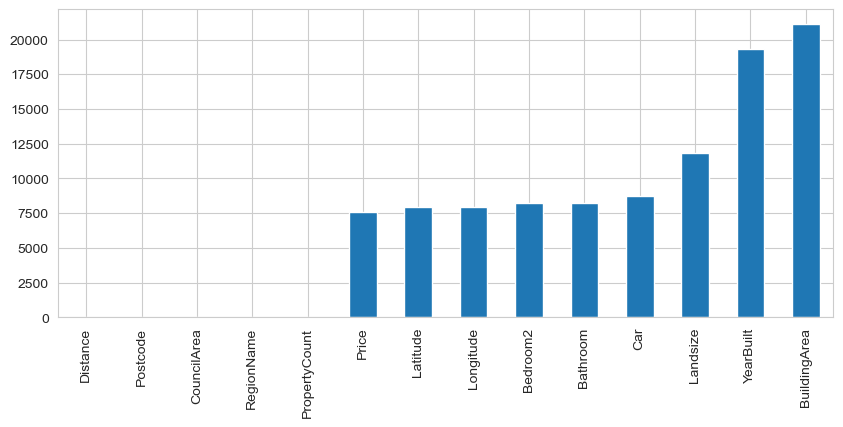

In [12]:
#finding out null values using bar graph
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(10,4))
missing.plot.bar()

**Dropping not wanted columns**

In [13]:
df = df.drop(['PropertyCount', 'Bedroom2', 'Method', 'SellerG'], axis=1)
df.head()

Suburb             Address  Rooms Type      Price       Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt         CouncilArea  Latitude  Longitude             RegionName
0  Abbotsford       68 Studley St      2    h        NaN  3/09/2016       2.5    3067.0       1.0  1.0     126.0           NaN        NaN  Yarra City Council  -37.8014   144.9958  Northern Metropolitan
1  Abbotsford        85 Turner St      2    h  1480000.0  3/12/2016       2.5    3067.0       1.0  1.0     202.0           NaN        NaN  Yarra City Council  -37.7996   144.9984  Northern Metropolitan
2  Abbotsford     25 Bloomburg St      2    h  1035000.0  4/02/2016       2.5    3067.0       1.0  0.0     156.0          79.0     1900.0  Yarra City Council  -37.8079   144.9934  Northern Metropolitan
3  Abbotsford  18/659 Victoria St      3    u        NaN  4/02/2016       2.5    3067.0       2.0  1.0       0.0           NaN        NaN  Yarra City Council  -37.8114   145.0116  Northern Metropolitan
4  Abbotsford        5 Charles St      3    h  1465000.0  4/03/2017       2.5    3067.0       2.0  0.0     134.0         150.0     1900.0  Yarra City Council  -37.8093   144.9944  Northern Metropolitan

In [14]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longitude', 'RegionName'], dtype='object')

In [15]:
df.shape

(34857, 17)

**Dealing with missing values**

To deal with missing numerical columns' data, it will be replaced with the column's mean.

In [16]:
mean_Distance = df['Distance'].astype('float').mean(axis=0)
mean_Postcode = df['Postcode'].astype('float').mean(axis=0)
mean_Bathroom = df['Bathroom'].astype('float').mean(axis=0)
mean_Car = df['Car'].astype('float').mean(axis=0)
mean_Landsize = df['Landsize'].astype('float').mean(axis=0)
mean_BuildingArea = df['BuildingArea'].astype('float').mean(axis=0)
mean_YearBuilt = df['YearBuilt'].astype('float').mean(axis=0)
mean_Latitude = df['Latitude'].astype('float').mean(axis=0)
mean_Longitude = df['Longitude'].astype('float').mean(axis=0)

In [17]:
df['Distance'].replace(np.nan, mean_Distance, inplace=True)
df['Postcode'].replace(np.nan, mean_Postcode, inplace=True)
df['Bathroom'].replace(np.nan, mean_Bathroom, inplace=True)
df['Car'].replace(np.nan, mean_Car, inplace=True)
df['Landsize'].replace(np.nan, mean_Landsize, inplace=True)
df['BuildingArea'].replace(np.nan, mean_BuildingArea, inplace=True)
df['YearBuilt'].replace(np.nan, mean_YearBuilt, inplace=True)
df['Latitude'].replace(np.nan, mean_Latitude, inplace=True)
df['Longitude'].replace(np.nan, mean_Longitude, inplace=True)

To deal with missing price data, the rows with missing prices will be dropped since that is the data that will be predicted. 

In [18]:
df.shape

(34857, 17)

In [19]:
df.dropna(subset=['Price'], axis=0, inplace=True)
df.shape

(27247, 17)

<AxesSubplot:>

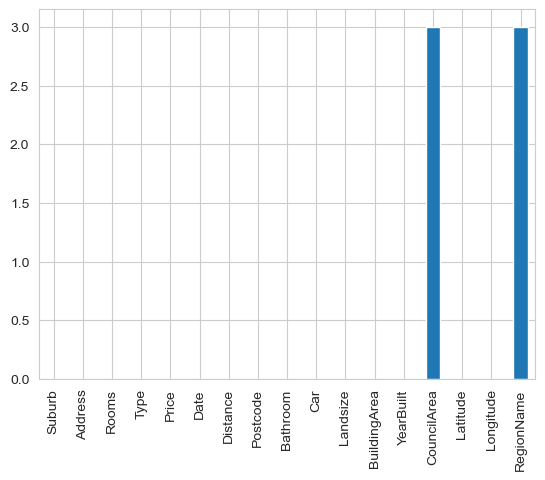

In [20]:
df.isnull().sum().plot.bar()

Dealing with missing Council Area and Region Name by matching data with postcodes:

In [21]:
df['CouncilArea'].value_counts(dropna=False)

Boroondara City Council           2520
Darebin City Council              2349
Moreland City Council             1790
Glen Eira City Council            1643
Moonee Valley City Council        1584
Melbourne City Council            1502
Banyule City Council              1457
Brimbank City Council             1366
Bayside City Council              1311
Maribyrnong City Council          1221
Hume City Council                 1036
Monash City Council               1007
Port Phillip City Council          952
Yarra City Council                 918
Stonnington City Council           884
Manningham City Council            842
Hobsons Bay City Council           799
Kingston City Council              735
Whittlesea City Council            709
Wyndham City Council               492
Whitehorse City Council            435
Maroondah City Council             356
Knox City Council                  287
Melton City Council                243
Frankston City Council             229
Greater Dandenong City Co

In [22]:
df['RegionName'].value_counts(dropna=False)

Southern Metropolitan         8524
Northern Metropolitan         7864
Western Metropolitan          5815
Eastern Metropolitan          3272
South-Eastern Metropolitan    1341
Eastern Victoria               166
Northern Victoria              166
Western Victoria                96
NaN                              3
Name: RegionName, dtype: int64

In [23]:
df.loc[(df['CouncilArea'].isna()) ,['Postcode','CouncilArea','RegionName']]

Postcode CouncilArea RegionName
18523  3011.000000         NaN        NaN
26888  3124.000000         NaN        NaN
29483  3116.062859         NaN        NaN

In [24]:
#Finding the dataframe matching postcode with missing values

ps_3011=df.loc[(df['Postcode']==3011 )]
print("Council Area based on postcode 3011 is ",ps_3011.CouncilArea.value_counts()[:1])
print("Region name based on postcode 3011 is ",ps_3011.RegionName.value_counts()[:1])

Council Area based on postcode 3011 is  Maribyrnong City Council    315
Name: CouncilArea, dtype: int64
Region name based on postcode 3011 is  Western Metropolitan    315
Name: RegionName, dtype: int64


In [25]:
ps_3124=df.loc[(df['Postcode']==3124 )]
print("Council Area based on postcode 3124 is ",ps_3124.CouncilArea.value_counts()[:1])
print("Region name based on postcode 3124 is ",ps_3124.RegionName.value_counts()[:1])

Council Area based on postcode 3124 is  Boroondara City Council    279
Name: CouncilArea, dtype: int64
Region name based on postcode 3124 is  Southern Metropolitan    279
Name: RegionName, dtype: int64


In [26]:
ps_3113=df.loc[(df['Postcode']==3116.062859 )]
print("Council Area based on postcode 3116.062859 is ",ps_3113.CouncilArea.value_counts()[:1])
print("Region name based on postcode 3116.062859 is ",ps_3113.RegionName.value_counts()[:1])

Council Area based on postcode 3116.062859 is  Series([], Name: CouncilArea, dtype: int64)
Region name based on postcode 3116.062859 is  Series([], Name: RegionName, dtype: int64)


Replacing missing council area based on postcode:

In [27]:
df.loc[(df['CouncilArea'].isna()) & (df['Postcode']==3011) , 'CouncilArea'] = "Maribyrnong City Council"
df.loc[(df['CouncilArea'].isna()) & (df['Postcode']==3124) , 'CouncilArea'] = "Boroondara City Council"

Replacing missing Region Name based on postcode:

In [28]:
df.loc[(df['RegionName'].isna()) & (df['Postcode']==3011) , 'RegionName'] = "Western Metropolitan"
df.loc[(df['RegionName'].isna()) & (df['Postcode']==3124) , 'RegionName'] = "Southern Metropolitan"

In [29]:
df.loc[(df['CouncilArea'].isna()) ,['Suburb','Postcode','CouncilArea','RegionName']]

Suburb     Postcode CouncilArea RegionName
29483  Fawkner Lot  3116.062859         NaN        NaN

In [30]:
df.query("Suburb == 'Fawkner Lot'")

Suburb       Address  Rooms Type     Price       Date   Distance     Postcode  Bathroom       Car    Landsize  BuildingArea    YearBuilt CouncilArea   Latitude   Longitude RegionName
29483  Fawkner Lot  1/3 Brian St      3    h  616000.0  6/01/2018  11.184929  3116.062859  1.624798  1.728845  593.598993      160.2564  1965.289885         NaN -37.810634  145.001851        NaN

In [31]:
df.drop(df.index[df['Suburb'] == 'Fawkner Lot'], inplace=True)

Since, finding dataframes with the Suburb of Fawkner Lot appear to be only one with no matching Council Areas or Region Names for the postcode, this row of data can be dropped.

<AxesSubplot:>

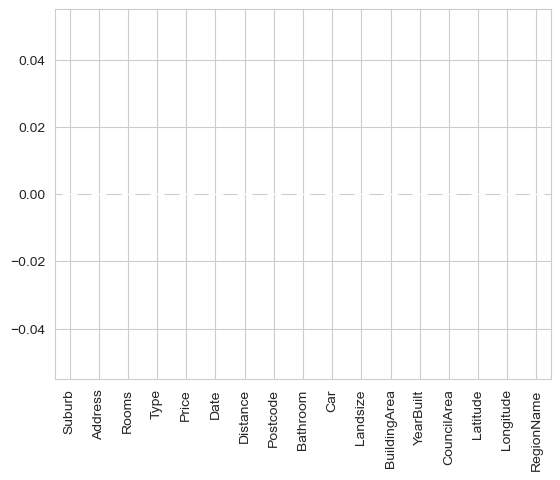

In [32]:
df.isnull().sum().plot.bar()

In [33]:
print("-"*30)
print("Final missing values of each column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("Total missing values:",df.isna().sum().sum())

------------------------------
Final missing values of each column
------------------------------
Suburb          0
Address         0
Rooms           0
Type            0
Price           0
Date            0
Distance        0
Postcode        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Latitude        0
Longitude       0
RegionName      0
dtype: int64
------------------------------
Total missing values: 0


In [34]:
df.shape

(27246, 17)

**Data Formatting**

The data types of all the modified missing value columns are required to be changed into either int or float:

In [35]:
 df.dtypes 

Suburb           object
Address          object
Rooms             int64
Type             object
Price           float64
Date             object
Distance        float64
Postcode        float64
Bathroom        float64
Car             float64
Landsize        float64
BuildingArea    float64
YearBuilt       float64
CouncilArea      object
Latitude        float64
Longitude       float64
RegionName       object
dtype: object

*Summary of columns with missing values previously modified:*
<li>Price:             7610</li>
<li>Distance:             1</li>
<li>Postcode:             1</li>
<li>Bathroom:          8226</li>
<li>Car:               8728</li>
<li>Landsize:         11810</li>
<li>BuildingArea:     21115</li>
<li>YearBuilt:        19306</li>
<li>CouncilArea:          3</li>
<li>Latitude:          7976</li>
<li>Longitude:         7976</li>
<li>RegionName:           3</li>

After ensuring all modified columns are float or integer, it can be observed from the data that Price, Postcode, Bathroom, Car, Landsize, BuildingArea, and YearBuilt are all usually whole numbers except for the replaced mean value data. Hence, these columns can be converted to integers. 

In [36]:
df[['Price', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']] = df[['Price', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']].astype('int64')
df[['Price', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']].dtypes

Price           int64
Postcode        int64
Bathroom        int64
Car             int64
Landsize        int64
BuildingArea    int64
YearBuilt       int64
dtype: object

In [37]:
df.dtypes

Suburb           object
Address          object
Rooms             int64
Type             object
Price             int64
Date             object
Distance        float64
Postcode          int64
Bathroom          int64
Car               int64
Landsize          int64
BuildingArea      int64
YearBuilt         int64
CouncilArea      object
Latitude        float64
Longitude       float64
RegionName       object
dtype: object

**separate the numeric columns from the categorical columns**

In [38]:
# select numerical columns
numeric_features = df.select_dtypes(include=[np.number])
numeric_columns = numeric_features.columns.values

numeric_columns

array(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Latitude', 'Longitude'],
      dtype=object)

In [39]:
# select categorical columns
categorical_features = df.select_dtypes(exclude=[np.number])
non_numeric_columns = categorical_features.columns.values

non_numeric_columns

array(['Suburb', 'Address', 'Type', 'Date', 'CouncilArea', 'RegionName'],
      dtype=object)

## EDA and Visualisation

**Price of houses compared to number of rooms**

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

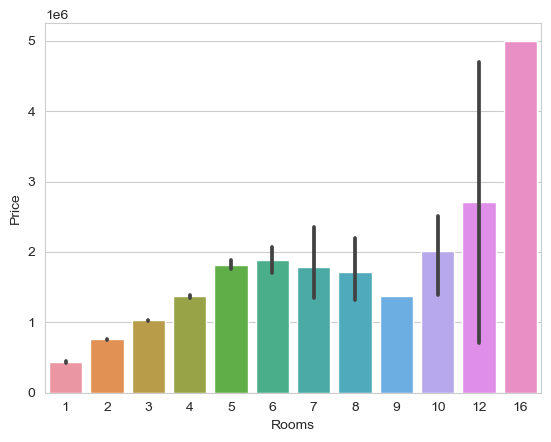

In [40]:
sns.barplot(x=df.Rooms , y = df.Price)

**Type of houses available in Melbourne Area according to this dataset**

In [41]:
df.Type.value_counts(dropna=False).to_frame()

Type
h  18471
u   5909
t   2866

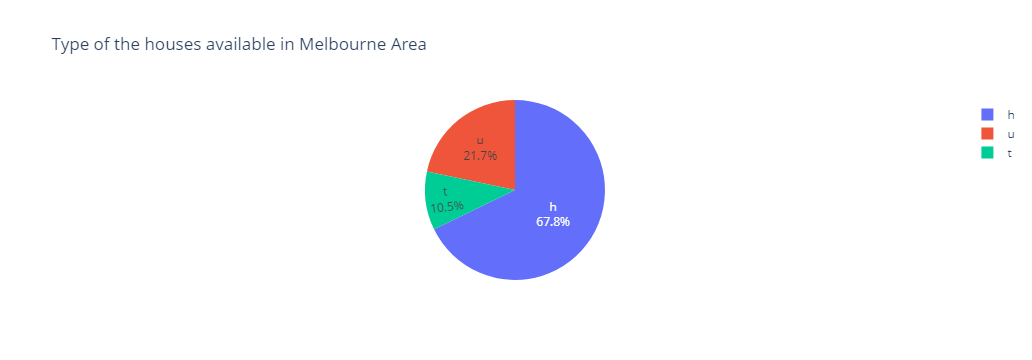

In [42]:
import plotly.express as px
%matplotlib inline

fig = px.pie(df.Type.value_counts(dropna=False), values='Type', names=['h','u','t'],
             title='Type of the houses available in Melbourne Area',width=600)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Most frequent available car parking spaces for each type of houses**

In [43]:
# h - house
type_h = df.loc[(df['Type'] == 'h') ,['Type','Car']]
type_h.head(5)
type_h.Car.value_counts()[:2]

2    7934
1    7162
Name: Car, dtype: int64

In [44]:
#u - unit, duplex;
type_u = df.loc[(df['Type'] == 'u') ,['Type','Car']]
type_u.Car.value_counts()[:2]

1    5117
2     576
Name: Car, dtype: int64

In [45]:
 #t - townhouse
type_t = df.loc[(df['Type'] == 't') ,['Type','Car']]
type_t.Car.value_counts()[:2]

1    1944
2     857
Name: Car, dtype: int64

<AxesSubplot:xlabel='Car', ylabel='count'>

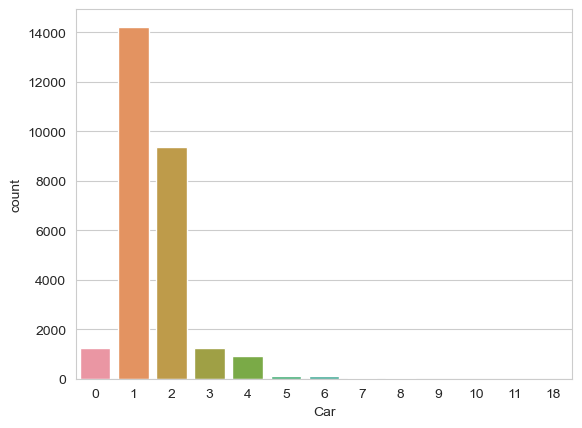

In [46]:
sns.countplot(x=df["Car"])

<AxesSubplot:xlabel='Car', ylabel='Price'>

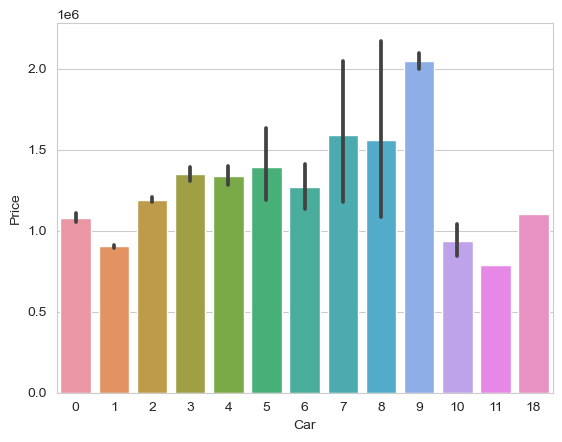

In [47]:
sns.barplot(x=df.Car , y = df.Price)

As we can see above , houses and townhouse has usually 2 car parking spcaces and unit has only one parking space available and some are available for 2 spots.

**Then expensive houses in Melbourne Area**

In [48]:
most_exp=pd.DataFrame(df.groupby('Type')['Price'].max()).reset_index().sort_values(by='Price', ascending=False).reset_index().drop('index',axis=1)
most_exp.head()

Type     Price
0    h  11200000
1    u   6500000
2    t   3820000

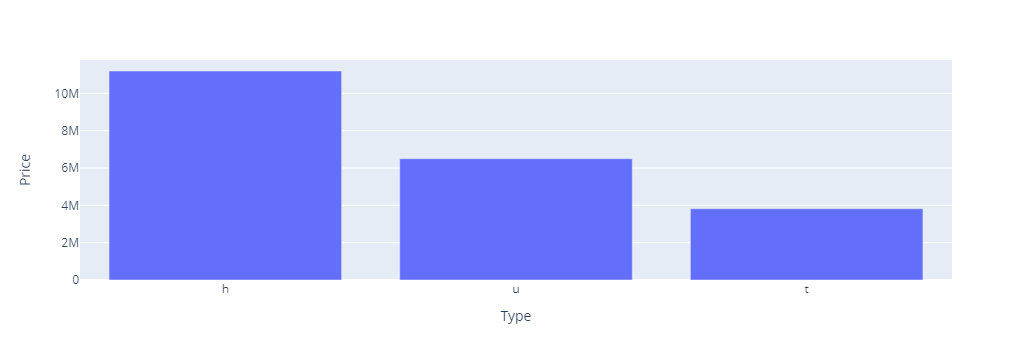

In [49]:
px.bar(y='Price', x='Type', data_frame=most_exp[:10])

**More insights about the Melbourne Housing Market**    

In [50]:
price_outliers = df[df['Price'] > 5000000]
price_outliers.head()

Suburb           Address  Rooms Type    Price        Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt               CouncilArea   Latitude   Longitude             RegionName
426     Armadale  367 Dandenong Rd      6    h  5525000  17/09/2016       6.3      3143         3    4      1491           516       1935  Stonnington City Council -37.860200  145.013000  Southern Metropolitan
1913    Brighton        11 Kent Av      4    h  5250000  27/06/2016      11.2      3186         1    1       593           160       1965      Bayside City Council -37.810634  145.001851  Southern Metropolitan
2869  Canterbury   14 Monomeath Av      5    h  5110000  28/05/2016       9.0      3126         1    1       593           160       1965   Boroondara City Council -37.810634  145.001851  Southern Metropolitan
5180    Hawthorn    49 Berkeley St      3    h  5100000   3/12/2016       4.6      3122         2    3      1038           160       1965   Boroondara City Council -37.833200  145.036600  Southern Metropolitan
5312    Hawthorn     50 Kinkora Rd      4    h  5050000  19/11/2016       4.6      3122         4    2       905           373       1913   Boroondara City Council -37.816800  145.032100  Southern Metropolitan

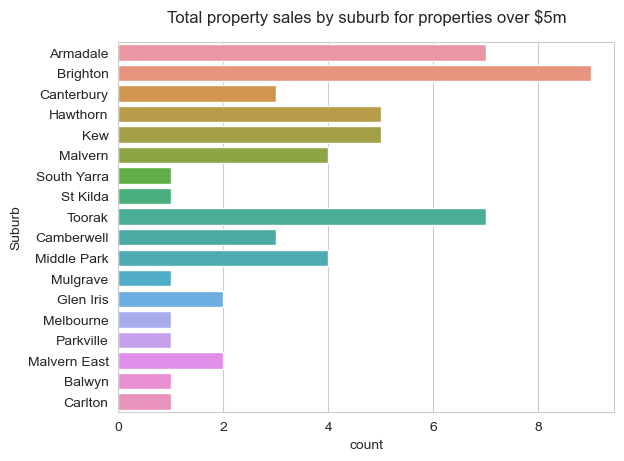

In [51]:
g = sns.countplot(data=price_outliers, y='Suburb')
g.set_title("Total property sales by suburb for properties over $5m", y=1.03);

These could the areas for costomers who have more than 500K (AUD) to purchase a property.

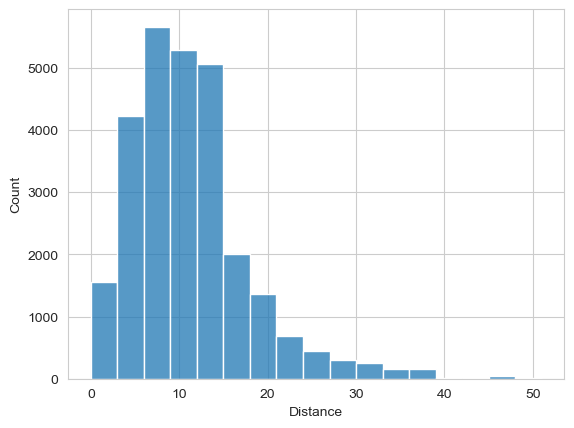

In [52]:
# Distance from CBD in kilometers
sns.histplot(data=df, x='Distance', binwidth=3);

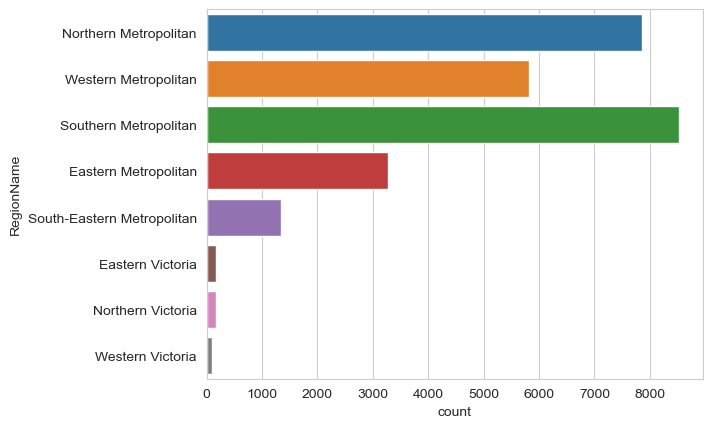

In [53]:
sns.countplot(data=df, y='RegionName');

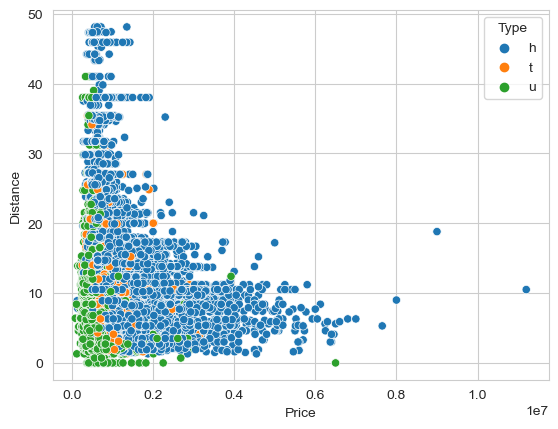

In [54]:
sns.scatterplot(data=df, x='Price', y='Distance', hue='Type');

### Summary
* As expected, most property sales were houses, followed by units, then townhouses.
* There are eight different regions, with most sales in Southern Metropolitan followed by Northern Metropolitan then Western Metropolitan. There were very few sales in Western, Northern, and Eastern Victoria, which I'm guessing is regional.
* It looks like there is slight negative relationship between Price and Distance. So property prices generally increase as distance from the Central business district (CBD) decreases.

## Correlations

In [55]:
correlation = df.corr()

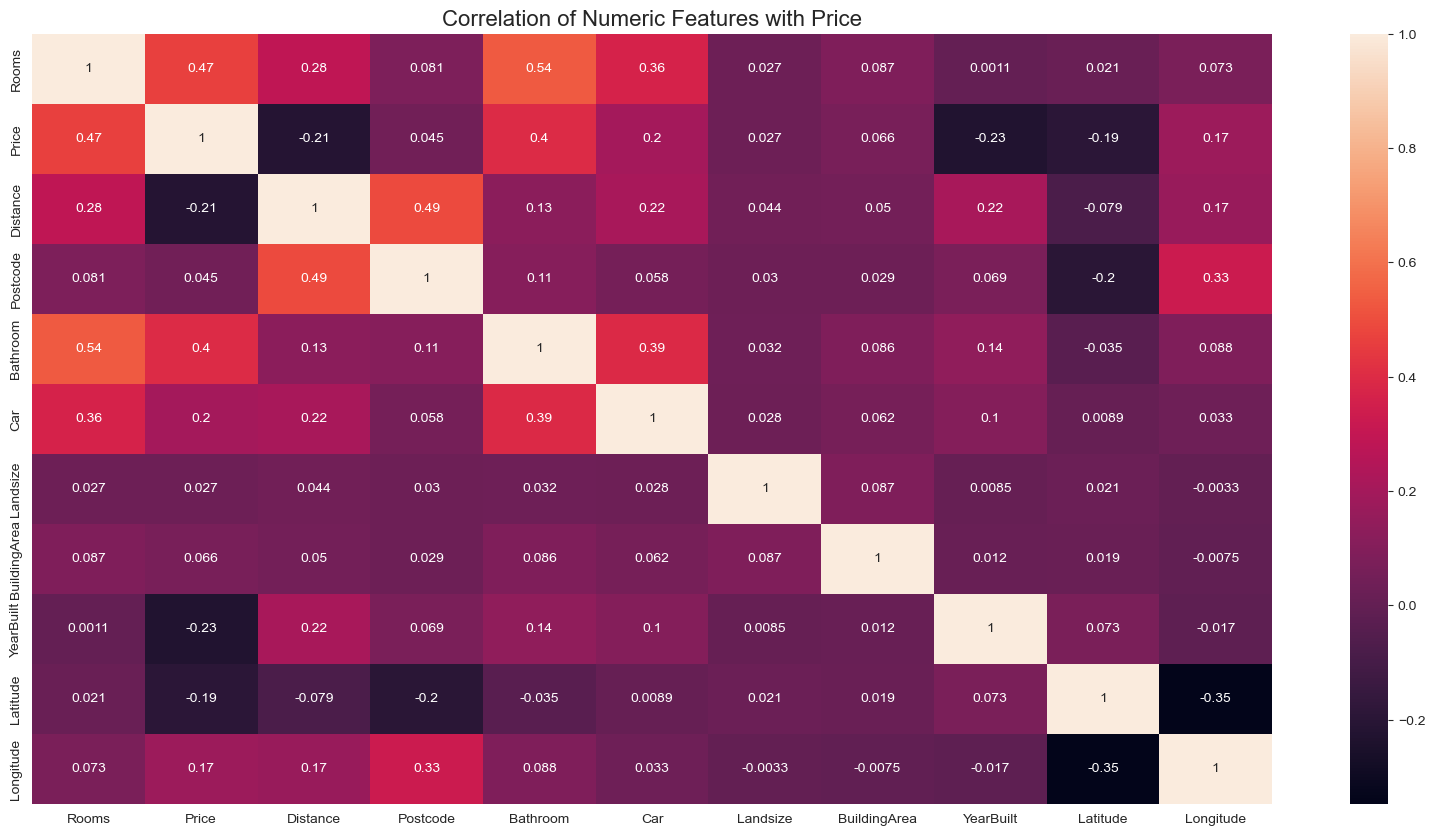

In [56]:
plt.figure(figsize=(20,10))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation, annot = True)
plt.savefig('heatmap.png')

In [57]:
print(correlation["Price"].sort_values(ascending = False),'\n')

Price           1.000000
Rooms           0.465242
Bathroom        0.395796
Car             0.202487
Longitude       0.174475
BuildingArea    0.066262
Postcode        0.044950
Landsize        0.027108
Latitude       -0.190460
Distance       -0.211384
YearBuilt      -0.230946
Name: Price, dtype: float64 



In [58]:
numeric_features.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Latitude', 'Longitude'], dtype='object')

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

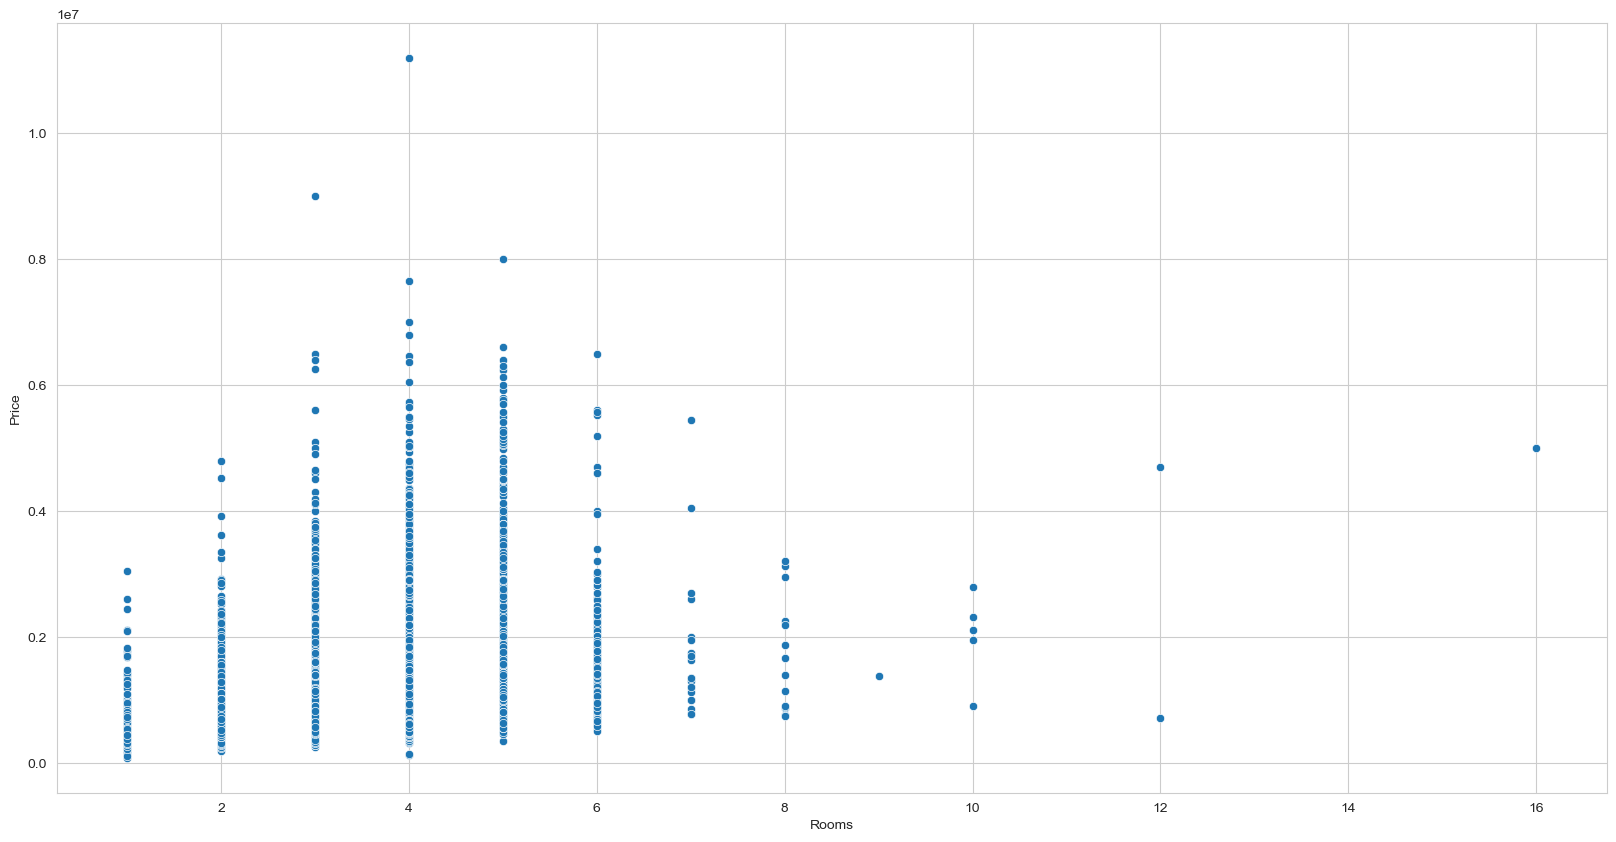

In [59]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= 'Rooms', y="Price", data=df)

<AxesSubplot:xlabel='Distance', ylabel='Price'>

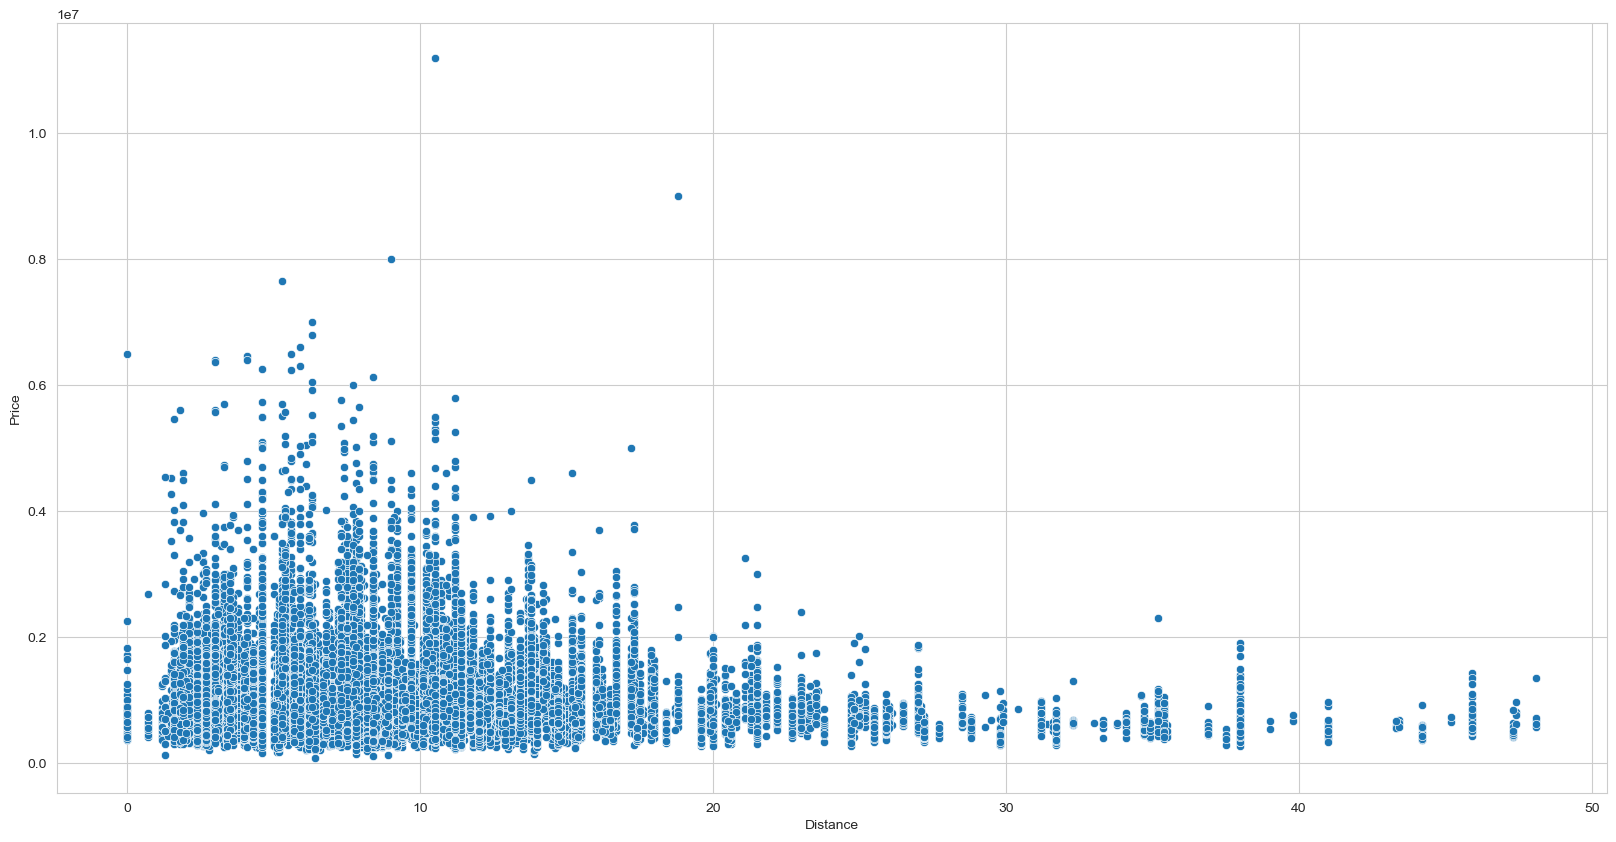

In [60]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= 'Distance', y="Price", data=df)

<AxesSubplot:xlabel='Postcode', ylabel='Price'>

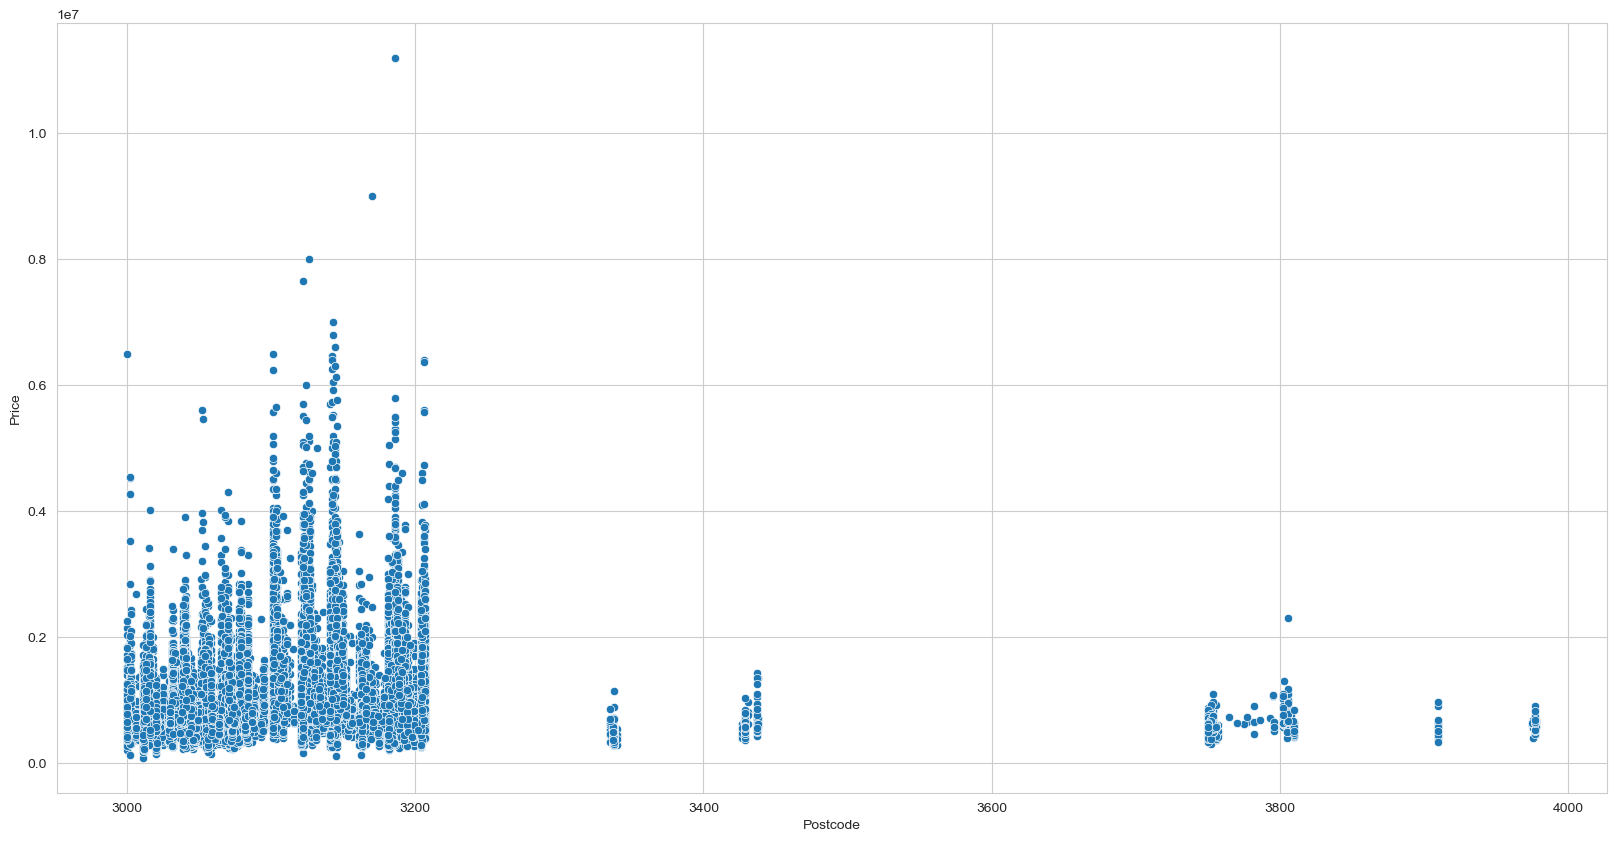

In [61]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= 'Postcode', y="Price", data=df)

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

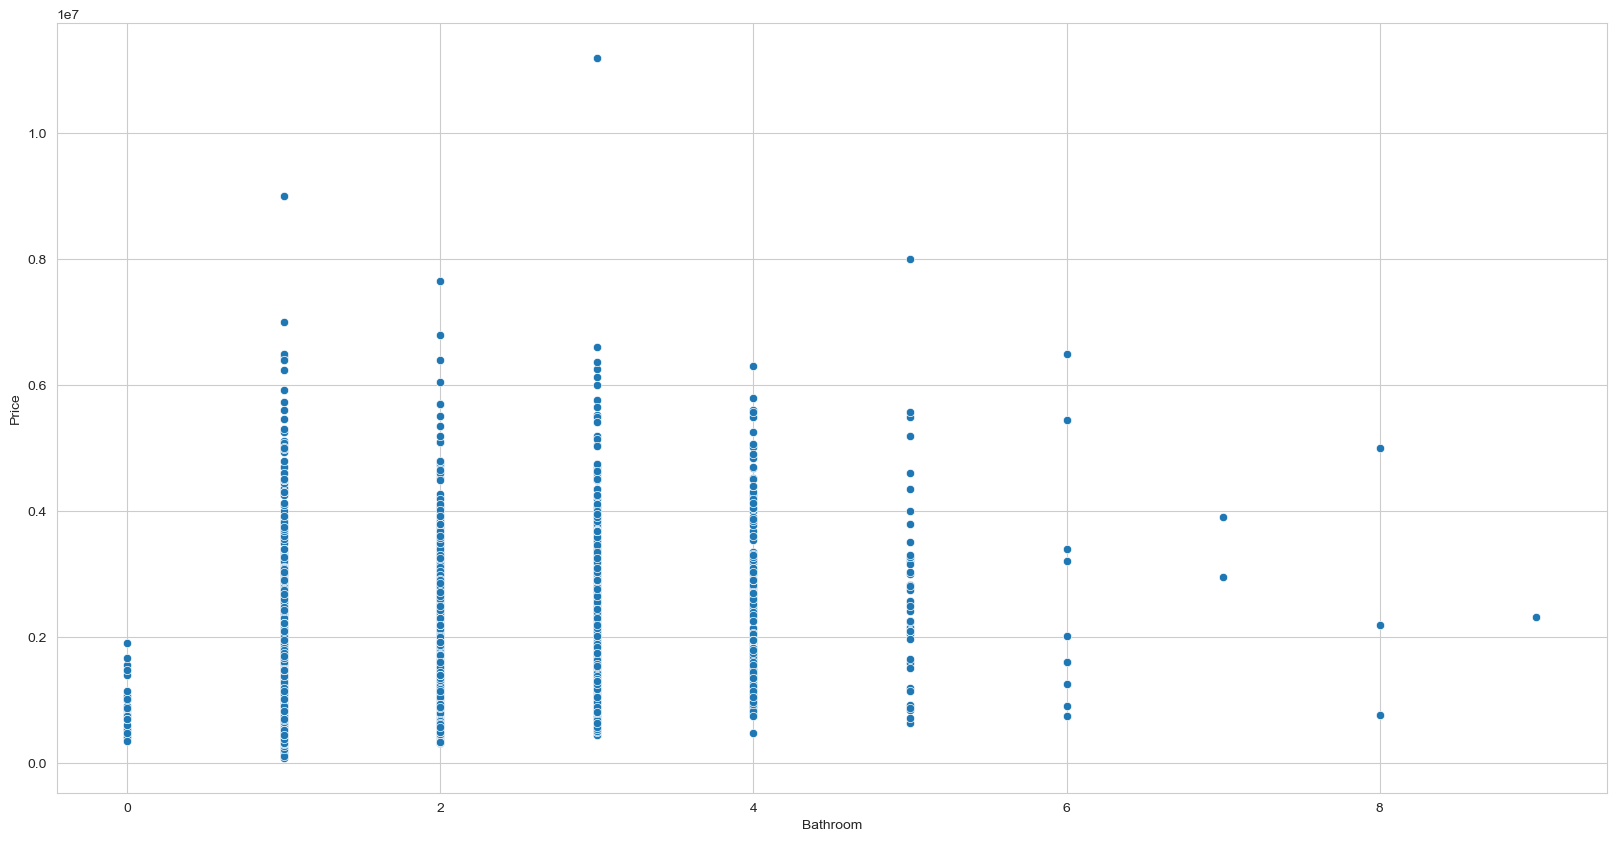

In [62]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= 'Bathroom', y="Price", data=df)

<AxesSubplot:xlabel='Car', ylabel='Price'>

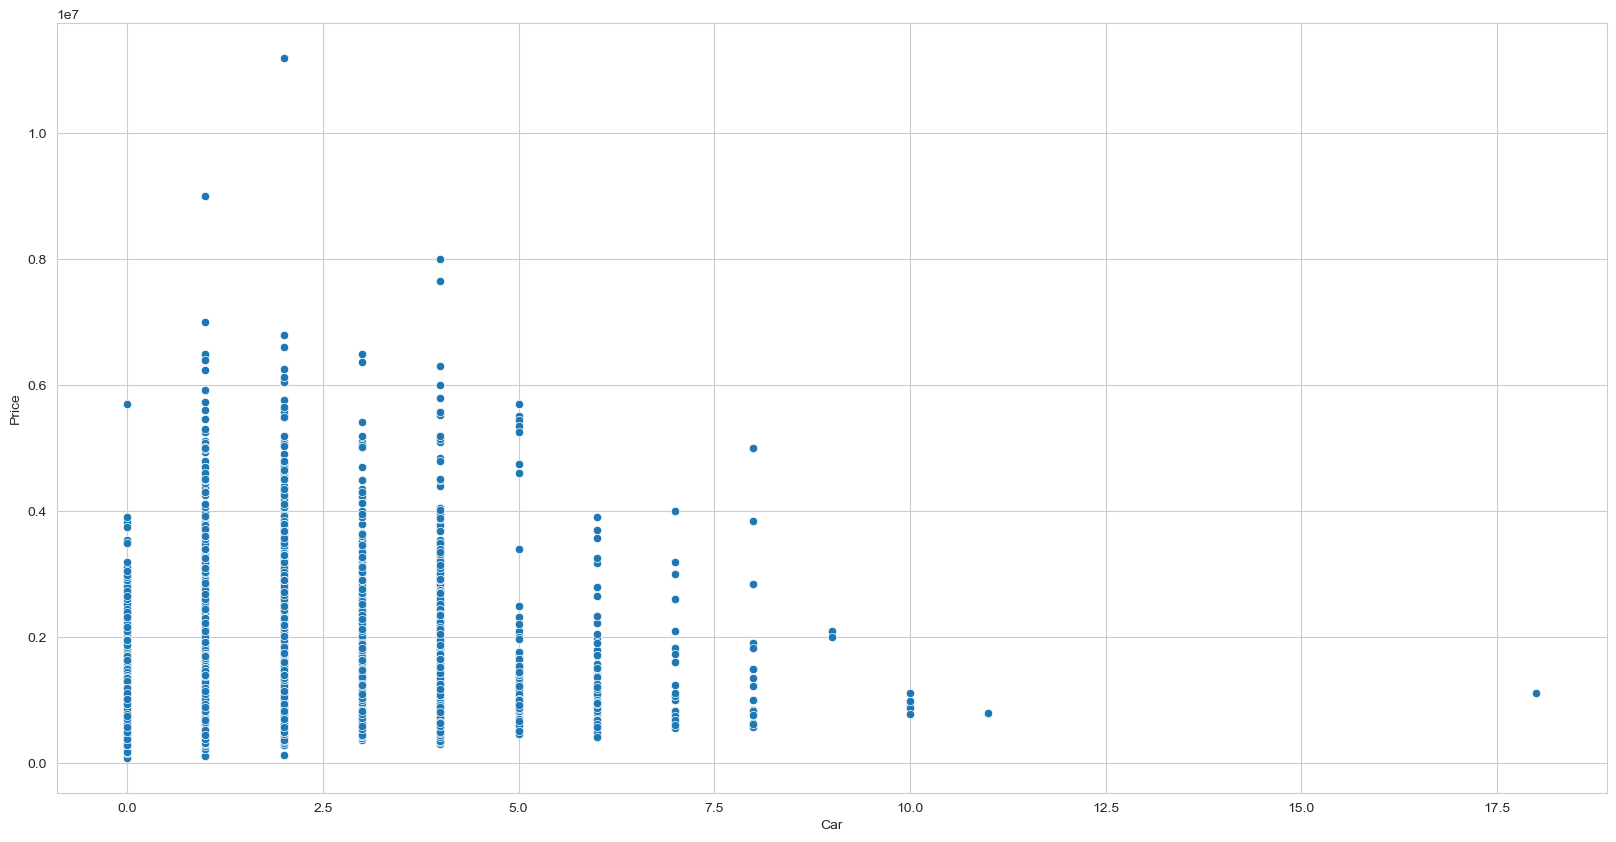

In [63]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= 'Car', y="Price", data=df)

<AxesSubplot:xlabel='Landsize', ylabel='Price'>

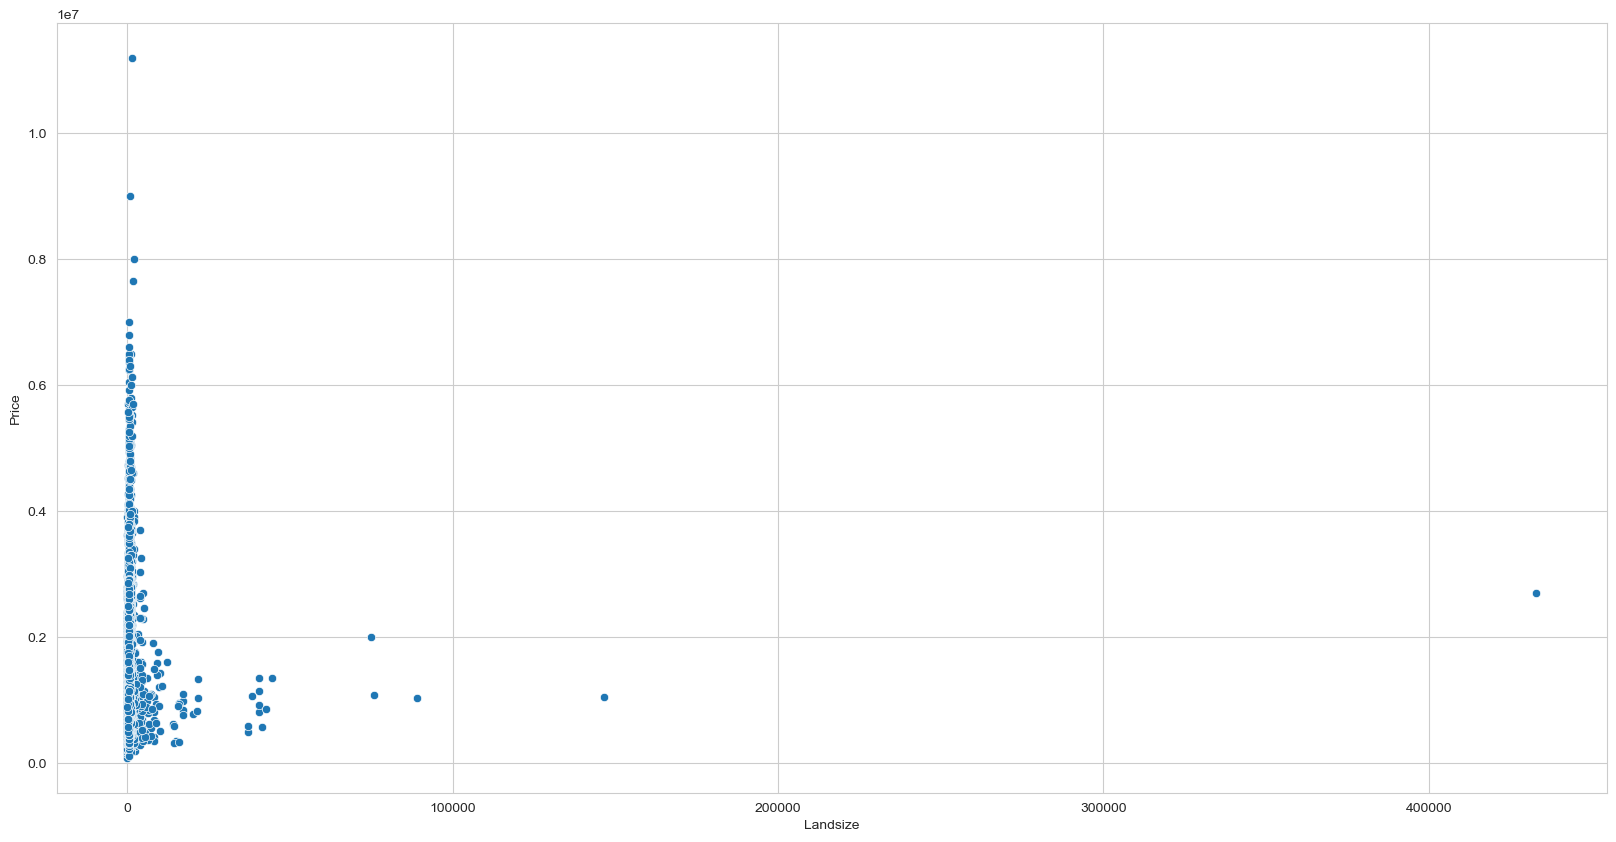

In [64]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= 'Landsize', y="Price", data=df)

<AxesSubplot:xlabel='BuildingArea', ylabel='Price'>

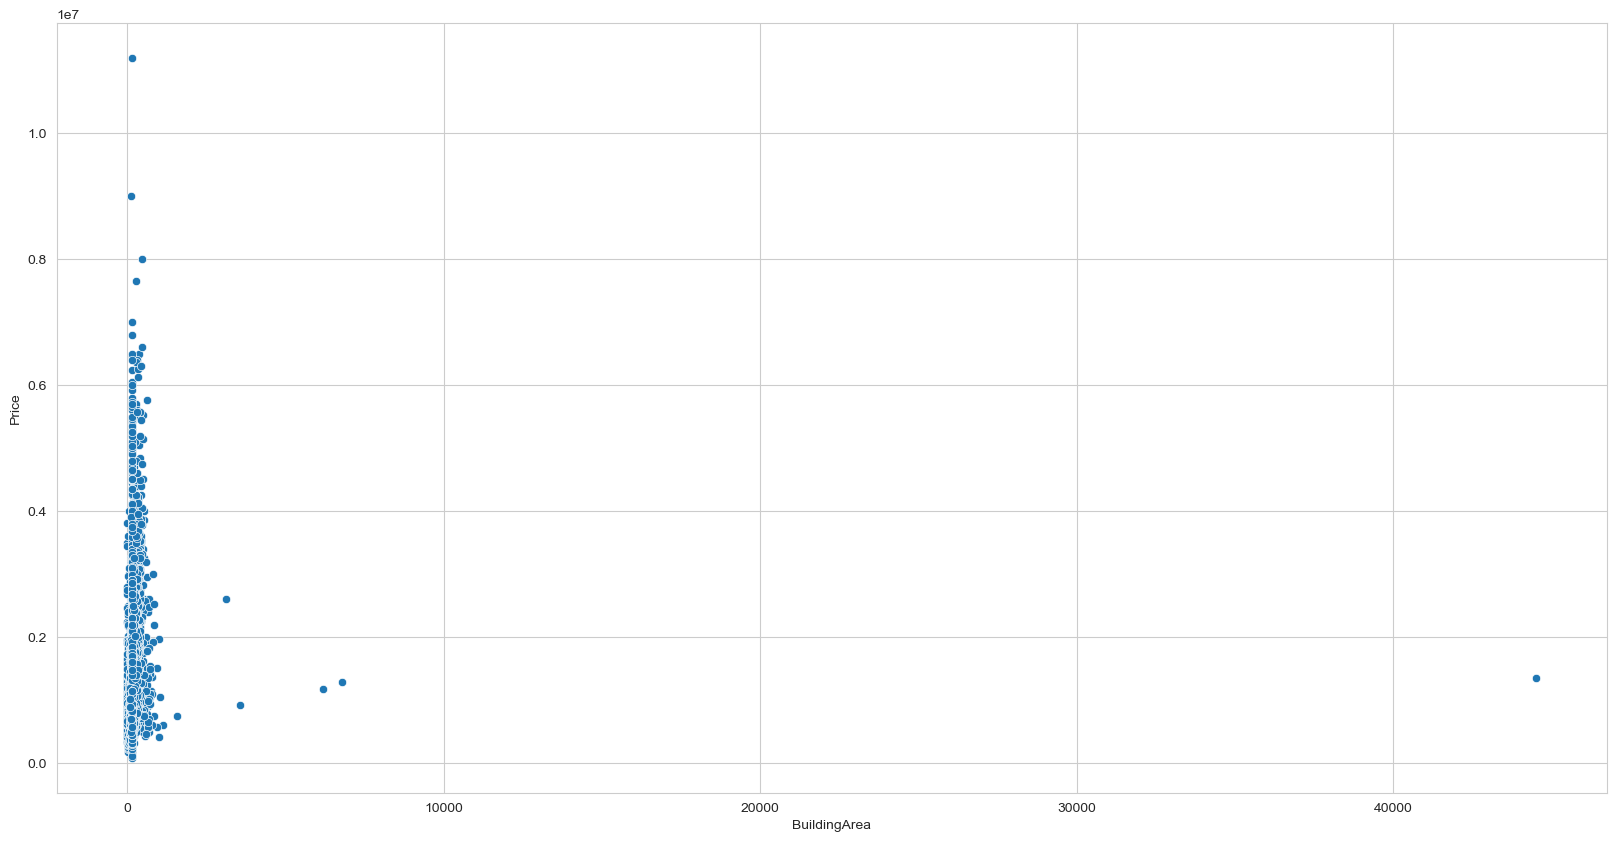

In [65]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= 'BuildingArea', y="Price", data=df)

<AxesSubplot:xlabel='YearBuilt', ylabel='Price'>

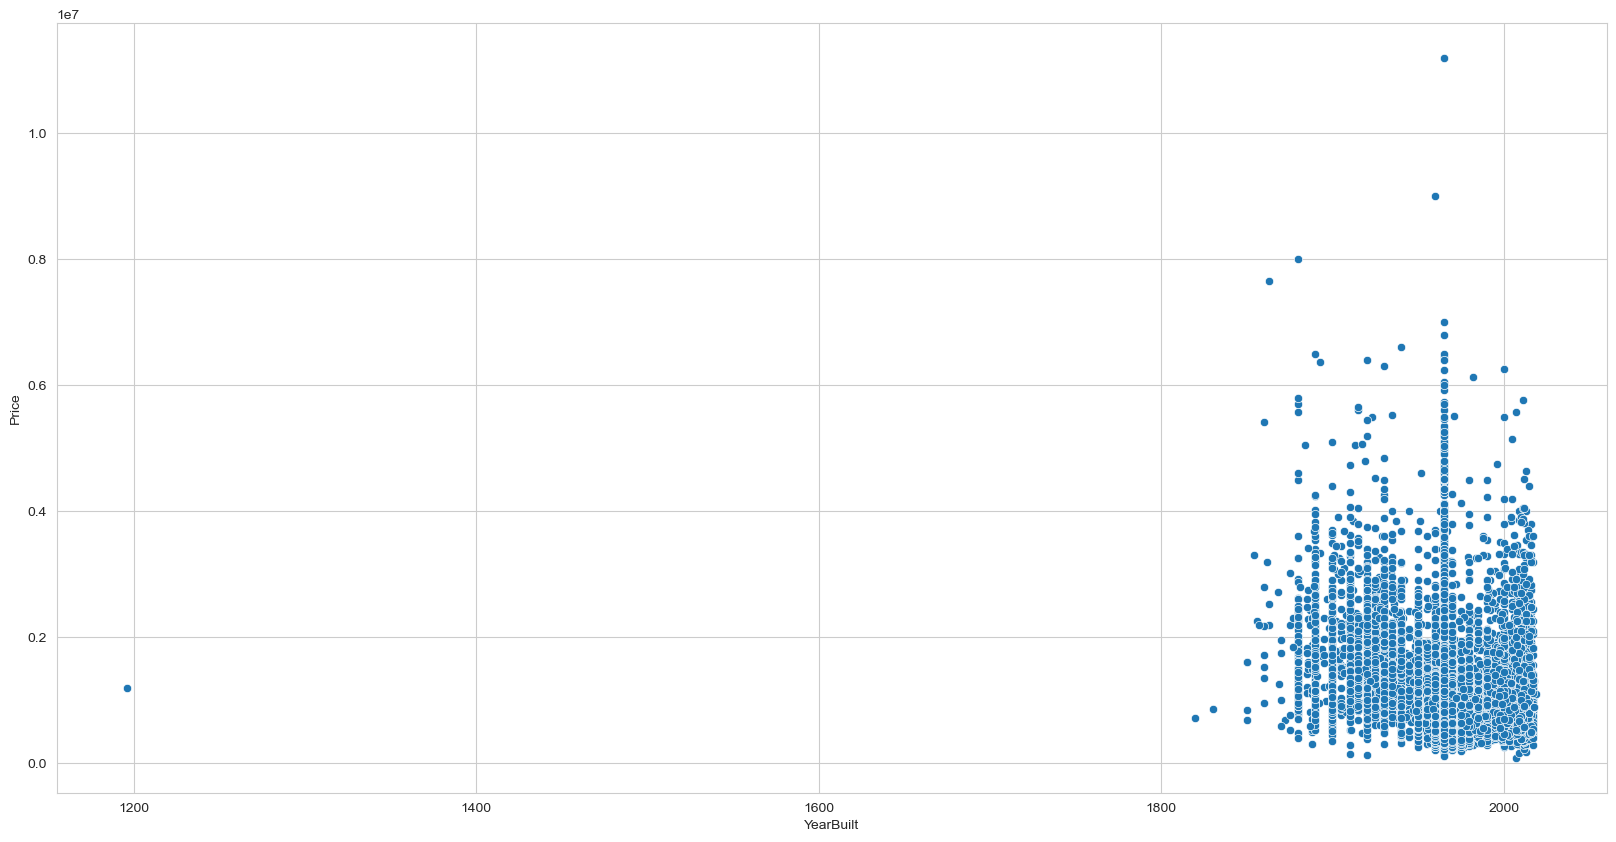

In [66]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= 'YearBuilt', y="Price", data=df)

<AxesSubplot:xlabel='Latitude', ylabel='Price'>

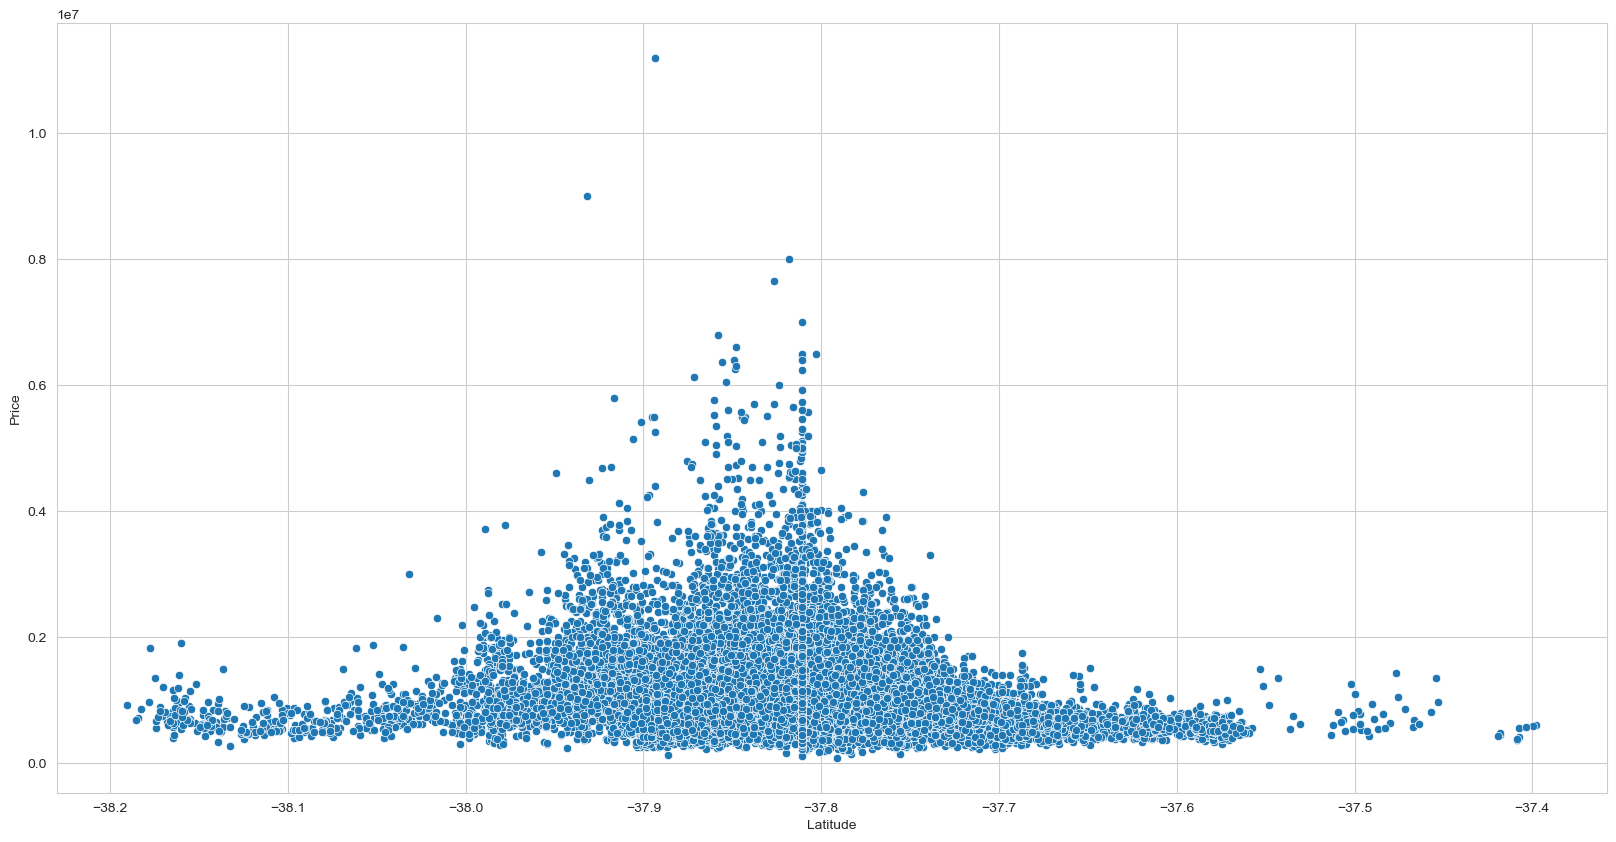

In [67]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= 'Latitude', y="Price", data=df)

<AxesSubplot:xlabel='Longitude', ylabel='Price'>

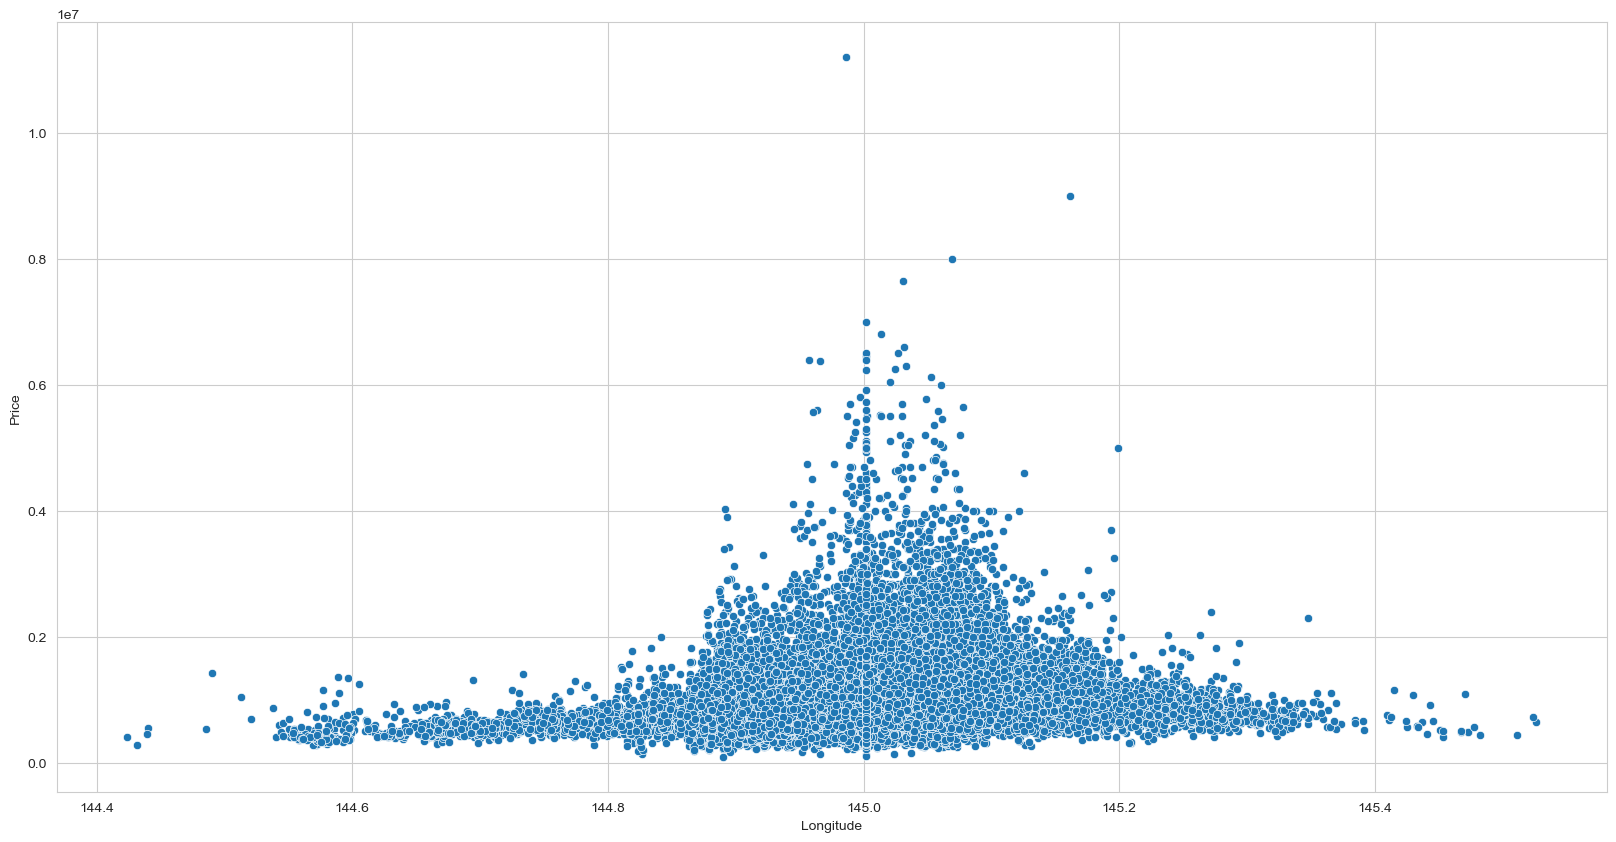

In [68]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= 'Longitude', y="Price", data=df)

Looking at the scatter plots above, especially the one of YearBuilt it seems like there is data regestered for a house built around the 1200s 

In [69]:
df['YearBuilt'].min()

1196

In [70]:
old_house = df.loc[df['YearBuilt'] == 1196]
old_house

Suburb         Address  Rooms Type    Price        Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt          CouncilArea  Latitude  Longitude            RegionName
16424  Mount Waverley  5 Armstrong St      3    h  1200000  24/06/2017      14.2      3149         1    4       807           117       1196  Monash City Council -37.86788  145.12121  Eastern Metropolitan

In [71]:
biggest_building = df.loc[df['BuildingArea'] == df['BuildingArea'].max()]
biggest_building

Suburb         Address  Rooms Type    Price        Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt                   CouncilArea  Latitude  Longitude         RegionName
22632  New Gisborne  71 Hamilton Rd      5    h  1355000  23/09/2017      48.1      3438         3    5     44500         44515       1965  Macedon Ranges Shire Council -37.45392  144.58864  Northern Victoria

In [72]:
max_rooms = df.loc[df['Rooms'] == df['Rooms'].max()]
max_rooms

Suburb         Address  Rooms Type    Price        Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt              CouncilArea  Latitude  Longitude            RegionName
26210  Mitcham  20 Harrison St     16    h  5000000  28/10/2017      17.2      3132         8    8       593           160       1965  Whitehorse City Council -37.81405  145.19891  Eastern Metropolitan

In [73]:
max_bathroom = df.loc[df['Bathroom'] == df['Bathroom'].max()]
max_bathroom

Suburb      Address  Rooms Type    Price        Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt          CouncilArea  Latitude  Longitude             RegionName
25717  Burwood  79 Elgar Rd     10    h  2315000  28/10/2017      10.4      3125         9    2       612           466       2015  Monash City Council -37.84461  145.10968  Southern Metropolitan

In [74]:
max_cars = df.loc[df['Car'] == df['Car'].max()]
max_cars

Suburb        Address  Rooms Type    Price        Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt             CouncilArea  Latitude  Longitude            RegionName
25839  Croydon  26 Railway Cr      2    h  1105000  28/10/2017      23.0      3136         1   18      1250           160       1965  Maroondah City Council -37.79097  145.28695  Eastern Metropolitan

The max number of rooms, bathrooms and cars looks reasonable, however, to make sureour data is clean and our prediction aren't affected we will remove the outliars of YearBuilt and Building Area columns.

In [75]:
# delete the rows with the outlairs
indexOld = df[(df['YearBuilt'] == 1196)].index
df.drop(indexOld , inplace=True)
df.head()

Suburb           Address  Rooms Type    Price       Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt         CouncilArea  Latitude  Longitude             RegionName
1  Abbotsford      85 Turner St      2    h  1480000  3/12/2016       2.5      3067         1    1       202           160       1965  Yarra City Council  -37.7996   144.9984  Northern Metropolitan
2  Abbotsford   25 Bloomburg St      2    h  1035000  4/02/2016       2.5      3067         1    0       156            79       1900  Yarra City Council  -37.8079   144.9934  Northern Metropolitan
4  Abbotsford      5 Charles St      3    h  1465000  4/03/2017       2.5      3067         2    0       134           150       1900  Yarra City Council  -37.8093   144.9944  Northern Metropolitan
5  Abbotsford  40 Federation La      3    h   850000  4/03/2017       2.5      3067         2    1        94           160       1965  Yarra City Council  -37.7969   144.9969  Northern Metropolitan
6  Abbotsford       55a Park St      4    h  1600000  4/06/2016       2.5      3067         1    2       120           142       2014  Yarra City Council  -37.8072   144.9941  Northern Metropolitan

In [76]:
df['BuildingArea'].max()

44515

In [77]:
# delete the rows with the outlairs
indexBiggest = df[(df['BuildingArea'] == 44515)].index
df.drop(indexBiggest , inplace=True)
df.head()

Suburb           Address  Rooms Type    Price       Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt         CouncilArea  Latitude  Longitude             RegionName
1  Abbotsford      85 Turner St      2    h  1480000  3/12/2016       2.5      3067         1    1       202           160       1965  Yarra City Council  -37.7996   144.9984  Northern Metropolitan
2  Abbotsford   25 Bloomburg St      2    h  1035000  4/02/2016       2.5      3067         1    0       156            79       1900  Yarra City Council  -37.8079   144.9934  Northern Metropolitan
4  Abbotsford      5 Charles St      3    h  1465000  4/03/2017       2.5      3067         2    0       134           150       1900  Yarra City Council  -37.8093   144.9944  Northern Metropolitan
5  Abbotsford  40 Federation La      3    h   850000  4/03/2017       2.5      3067         2    1        94           160       1965  Yarra City Council  -37.7969   144.9969  Northern Metropolitan
6  Abbotsford       55a Park St      4    h  1600000  4/06/2016       2.5      3067         1    2       120           142       2014  Yarra City Council  -37.8072   144.9941  Northern Metropolitan

In [78]:
df.shape

(27244, 17)

**Trying to understand more about the predicted varaibale - "Price"**

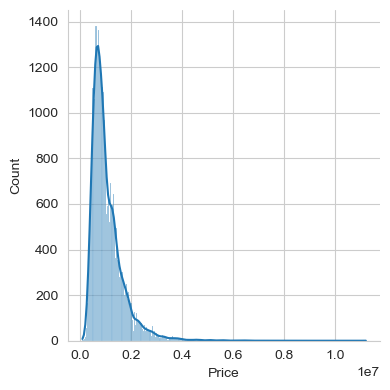

In [79]:
sns.set_style()
sns.displot(df.Price, height=4, kde=True)

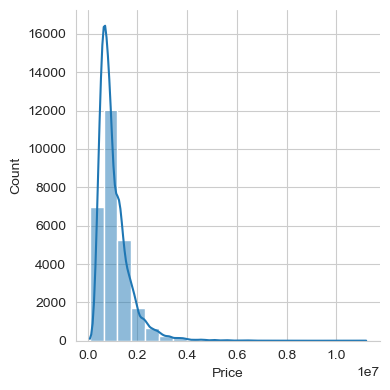

In [80]:
sns.displot(df['Price'],bins = 20, height=4, kde=True);

<AxesSubplot:xlabel='Price'>

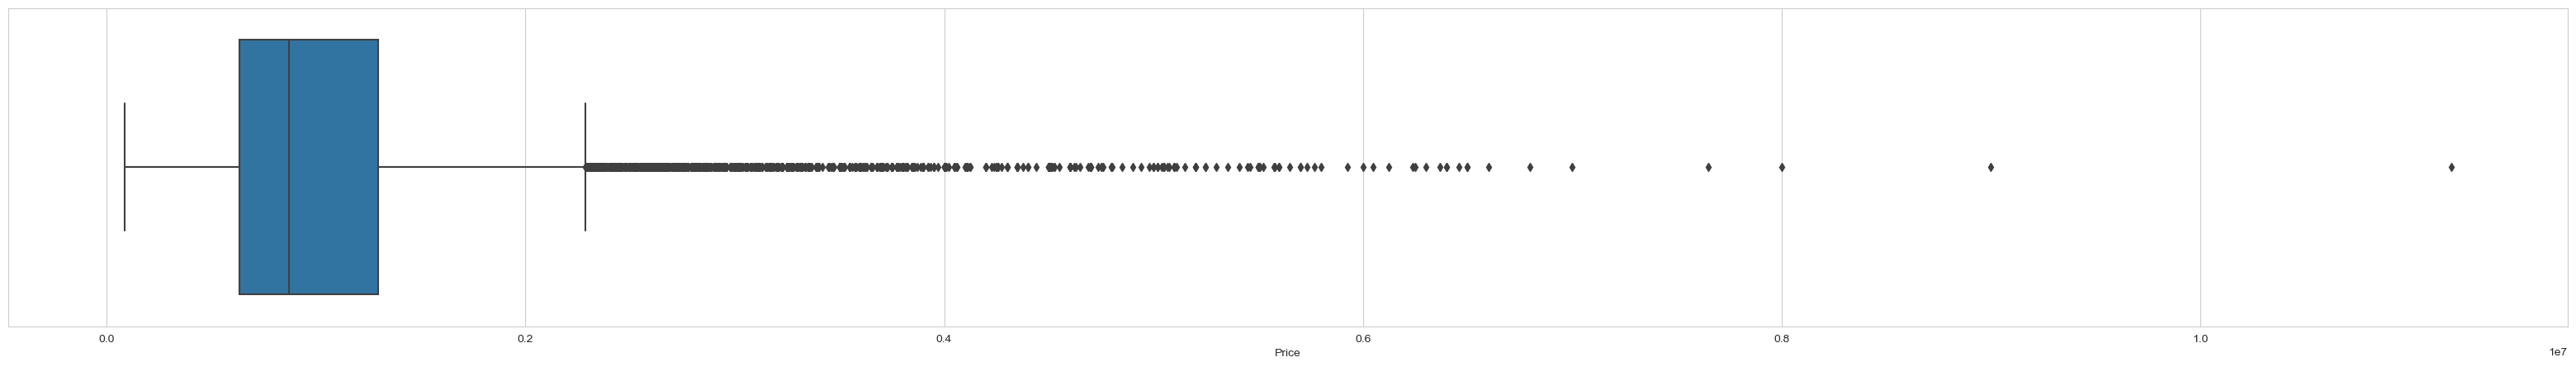

In [81]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(40, 5))
sns.boxplot(x=df["Price"])

**More plots about the rest of the columns**

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'Postcode'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>]],
      dtype=object)

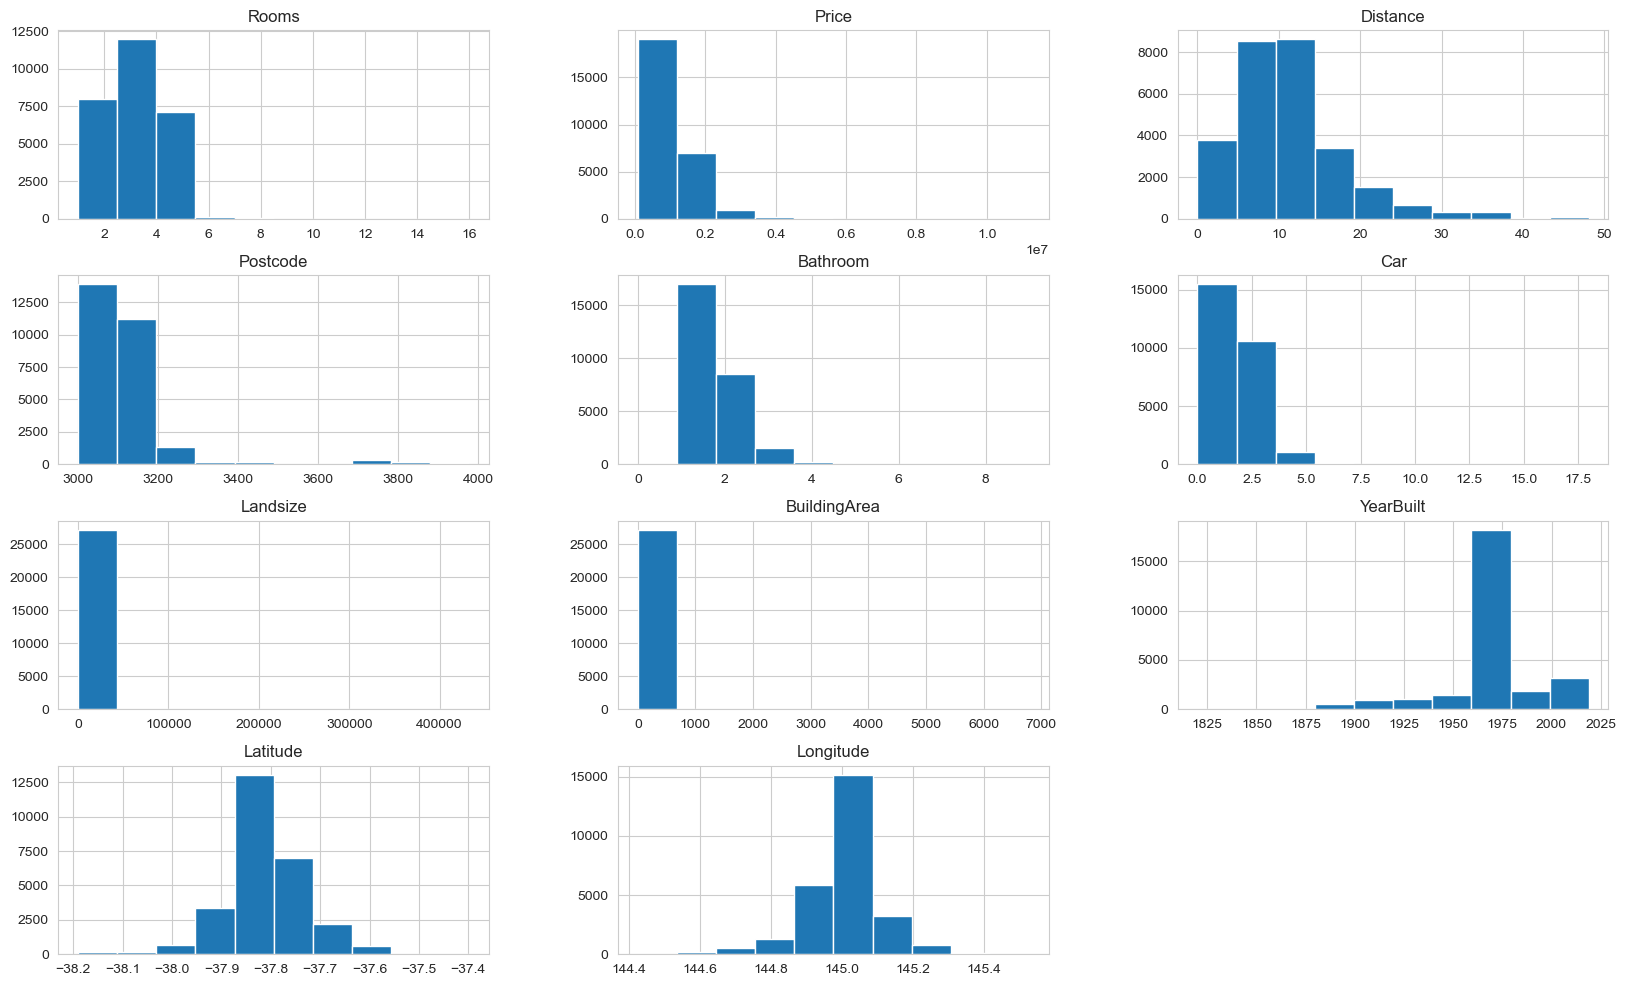

In [82]:
df.hist(figsize=(20,12))

**Data Normalisation**

In [83]:
df.describe()

Rooms         Price      Distance      Postcode      Bathroom           Car       Landsize  BuildingArea     YearBuilt      Latitude     Longitude
count  27244.000000  2.724400e+04  27244.000000  27244.000000  27244.000000  27244.000000   27244.000000  27244.000000  27244.000000  27244.000000  27244.000000
mean       2.992218  1.050173e+06     11.278817   3113.782888      1.451659      1.536008     591.703237    157.132470   1965.741962    -37.807816    144.997901
std        0.954770  6.414938e+05      6.784028    111.126192      0.661952      0.914542    3040.856410     81.893709     24.047977      0.080410      0.105925
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000      0.000000       0.000000      0.000000   1820.000000    -38.190430    144.423790
25%        2.000000  6.350000e+05      6.400000   3046.000000      1.000000      1.000000     351.000000    156.000000   1965.000000    -37.842830    144.954375
50%        3.000000  8.700000e+05     10.500000   3088.000000      1.000000      1.000000     593.000000    160.000000   1965.000000    -37.810634    145.001851
75%        4.000000  1.295000e+06     14.000000   3153.000000      2.000000      2.000000     593.000000    160.000000   1965.000000    -37.766000    145.048345
max       16.000000  1.120000e+07     48.100000   3978.000000      9.000000     18.000000  433014.000000   6791.000000   2019.000000    -37.397800    145.526350

In [84]:
from sklearn.preprocessing import RobustScaler

In [85]:
scaled_features = df.copy()

col_names = numeric_columns
features = scaled_features[col_names]

scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features

In [86]:
scaled_features.head()

Suburb           Address  Rooms Type     Price       Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt         CouncilArea  Latitude  Longitude             RegionName
1  Abbotsford      85 Turner St   -0.5    h  0.924242  3/12/2016 -1.052632 -0.196262       0.0  0.0 -1.615702          0.00        0.0  Yarra City Council  0.143620  -0.036726  Northern Metropolitan
2  Abbotsford   25 Bloomburg St   -0.5    h  0.250000  4/02/2016 -1.052632 -0.196262       0.0 -1.0 -1.805785        -20.25      -65.0  Yarra City Council  0.035589  -0.089934  Northern Metropolitan
4  Abbotsford      5 Charles St    0.0    h  0.901515  4/03/2017 -1.052632 -0.196262       1.0 -1.0 -1.896694         -2.50      -65.0  Yarra City Council  0.017367  -0.079293  Northern Metropolitan
5  Abbotsford  40 Federation La    0.0    h -0.030303  4/03/2017 -1.052632 -0.196262       1.0  0.0 -2.061983          0.00        0.0  Yarra City Council  0.178762  -0.052688  Northern Metropolitan
6  Abbotsford       55a Park St    0.5    h  1.106061  4/06/2016 -1.052632 -0.196262       0.0  1.0 -1.954545         -4.50       49.0  Yarra City Council  0.044700  -0.082485  Northern Metropolitan

**Turning Categorical Columns into Numerical Columns**

In [87]:
scaled_features_dummy = scaled_features.copy()

scaled_features_dummy = pd.get_dummies(scaled_features_dummy,
                         columns = ['Suburb', 'Type', 'CouncilArea', 'RegionName'])
  
scaled_features_dummy.head()

Address  Rooms     Price       Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt  Latitude  Longitude  Suburb_Abbotsford  Suburb_Aberfeldie  Suburb_Airport West  Suburb_Albanvale  Suburb_Albert Park  Suburb_Albion  Suburb_Alphington  Suburb_Altona  Suburb_Altona Meadows  Suburb_Altona North  Suburb_Ardeer  Suburb_Armadale  Suburb_Ascot Vale  Suburb_Ashburton  Suburb_Ashwood  Suburb_Aspendale  Suburb_Aspendale Gardens  Suburb_Attwood  \
1      85 Turner St   -0.5  0.924242  3/12/2016 -1.052632 -0.196262       0.0  0.0 -1.615702          0.00        0.0  0.143620  -0.036726                  1                  0                    0                 0                   0              0                  0              0                      0                    0              0                0                  0                 0               0                 0                         0               0   
2   25 Bloomburg St   -0.5  0.250000  4/02/2016 -1.052632 -0.196262       0.0 -1.0 -1.805785        -20.25      -65.0  0.035589  -0.089934                  1                  0                    0                 0                   0              0                  0              0                      0                    0              0                0                  0                 0               0                 0                         0               0   
4      5 Charles St    0.0  0.901515  4/03/2017 -1.052632 -0.196262       1.0 -1.0 -1.896694         -2.50      -65.0  0.017367  -0.079293                  1                  0                    0                 0                   0              0                  0              0                      0                    0              0                0                  0                 0               0                 0                         0               0   
5  40 Federation La    0.0 -0.030303  4/03/2017 -1.052632 -0.196262       1.0  0.0 -2.061983          0.00        0.0  0.178762  -0.052688                  1                  0                    0                 0                   0              0                  0              0                      0                    0              0                0                  0                 0               0                 0                         0               0   
6       55a Park St    0.5  1.106061  4/06/2016 -1.052632 -0.196262       0.0  1.0 -1.954545         -4.50       49.0  0.044700  -0.082485                  1                  0                    0                 0                   0              0                  0              0                      0                    0              0                0                  0                 0               0                 0                         0               0   

   Suburb_Avondale Heights  Suburb_Bacchus Marsh  Suburb_Balaclava  Suburb_Balwyn  Suburb_Balwyn North  Suburb_Bayswater  Suburb_Bayswater North  Suburb_Beaconsfield  Suburb_Beaconsfield Upper  Suburb_Beaumaris  Suburb_Bellfield  Suburb_Bentleigh  Suburb_Bentleigh East  Suburb_Berwick  Suburb_Black Rock  Suburb_Blackburn  Suburb_Blackburn North  Suburb_Blackburn South  Suburb_Bonbeach  Suburb_Boronia  Suburb_Botanic Ridge  Suburb_Box Hill  Suburb_Braybrook  Suburb_Briar Hill  Suburb_Brighton  \
1                        0                     0                 0              0                    0                 0                       0                    0                          0                 0                 0                 0                      0               0                  0                 0                       0                       0                0               0                     0                0                 0                  0                0   
2                        0                     0                 0              0                    0                 0                       0     

**Saving Clean Data**

In [88]:
#scaled_features_dummy.to_csv('cleaned_data.csv', encoding='utf-8', index=False)

**Feature Selection and Data Splitting**

In [89]:
from sklearn.model_selection import train_test_split # for data split

In [90]:
# FEATURE SELECTION & DATA SPLIT

X_var = scaled_features_dummy.drop(['Price','Address', 'Date'],axis=1) # Features
y_var = scaled_features_dummy['Price']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 42) #80 % training and 20% testing

print(X_train.shape); print(X_test.shape)

(21795, 398)
(5449, 398)


**Modeling**

In [92]:
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.ensemble import RandomForestRegressor # Random Forest

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.metrics import mean_squared_error as m2_error

In [93]:
# 1. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [94]:
ridge_train_pred = ridge.predict(X_train)
print('MSE:', np.sqrt(m2_error(y_train, ridge_train_pred)))
print('R2 :',r2(y_train, ridge_train_pred))

MSE: 0.5634383297845941
R2 : 0.6636000563813196


In [95]:
ridge_test_pred = ridge.predict(X_test)
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_test_pred)))
print('Mean Squared Error of Ridge model is {}'.format(m2_error(y_test, ridge_test_pred)))
print('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_test_pred)))

-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.6331696135237521
Mean Squared Error of Ridge model is 0.3479460898705062
R-Squared of Ridge model is 0.6331427303845301


In [96]:
# 2. Lasso

lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [97]:
lasso_train_pred = lasso.predict(X_train)
print('MSE:', np.sqrt(m2_error(y_train, lasso_train_pred)))
print('R2 :',r2(y_train, lasso_train_pred))

MSE: 0.5650288896925862
R2 : 0.6616980931471108


In [98]:
lasso_test_pred = lasso.predict(X_test)
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_test_pred)))
print('Mean Squared Error of Lasso model is {}'.format(m2_error(y_test, lasso_test_pred)))
print('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_test_pred)))

-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.6325063355867513
Mean Squared Error of Lasso model is 0.3485759078068528
R-Squared of Lasso model is 0.6324786812826448


In [99]:
# 3. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)

BayesianRidge()

In [100]:
bayesian_train_pred = bayesian.predict(X_train)
print('MSE:', np.sqrt(m2_error(y_train, bayesian_train_pred)))
print('R2 :',r2(y_train, bayesian_train_pred))

MSE: 0.5640892990115504
R2 : 0.6628222870938817


In [101]:
bayesian_test_pred = bayesian.predict(X_test)
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_test_pred)))
print('Mean Squared Error of Bayesian model is {}'.format(m2_error(y_test, bayesian_test_pred)))
print('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_test_pred)))

-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.6330048490555267
Mean Squared Error of Bayesian model is 0.34810201244512523
R-Squared of Bayesian model is 0.6329783332791699


In [102]:
# 4. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [103]:
en_train_pred = en.predict(X_train)
print('MSE:', np.sqrt(m2_error(y_train, en_train_pred)))
print('R2 :',r2(y_train, en_train_pred))

MSE: 0.6154225995401468
R2 : 0.5986622430806868


In [104]:
en_test_pred = en.predict(X_test)
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of ElasticNet model is {}'.format(evs(y_test, en_test_pred)))
print('Mean Squared Error of ElasticNet model is {}'.format(m2_error(y_test, en_test_pred)))
print('R-Squared of ElasticNet model is {}'.format(r2(y_test, en_test_pred)))

-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet model is 0.5495109655792568
Mean Squared Error of ElasticNet model is 0.4272806761813734
R-Squared of ElasticNet model is 0.5494962386797109


In [105]:
# 5. Random Forest

forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [106]:
forest_train_pred = forest.predict(X_train)
print('MSE:', np.sqrt(m2_error(y_train, forest_train_pred)))
print('R2 :',r2(y_train, forest_train_pred))

MSE: 0.22876929116405245
R2 : 0.9445427166307654


In [107]:
forest_test_pred = forest.predict(X_test)
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Random Forest model is {}'.format(evs(y_test, forest_test_pred)))
print('Mean Squared Error of Random Forest model is {}'.format(m2_error(y_test, forest_test_pred)))
print('R-Squared of Random Forest model is {}'.format(r2(y_test, forest_test_pred)))

-------------------------------------------------------------------------------
Explained Variance Score of Random Forest model is 0.8186226695428569
Mean Squared Error of Random Forest model is 0.17202898888934584
R-Squared of Random Forest model is 0.8186210824149717


**Feature selection for Linear regression**

In [108]:
from sklearn.linear_model import LinearRegression # OLS algorithm

In [109]:
X = scaled_features.drop(['Price','Suburb','Address','Type','Date', 'CouncilArea', 'RegionName'],axis=1) # Features
y = scaled_features['Price']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #80 % training and 20% testing

print(X_train.shape); print(X_test.shape)

(21795, 10)
(5449, 10)


In [111]:
# 6. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [112]:
ols_train_pred = ols.predict(X_train)
print('MSE:', np.sqrt(m2_error(y_train, ols_train_pred)))
print('R2 :',r2(y_train, ols_train_pred))

MSE: 0.6914597769982492
R2 : 0.493362908420519


In [113]:
ols_test_pred = ols.predict(X_test)
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_test_pred)))
print('Mean Squared Error of OLS model is {}'.format(m2_error(y_test, ols_test_pred)))
print('R-Squared of OLS model is {}'.format(r2(y_test, ols_test_pred)))

-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.4232288999420787
Mean Squared Error of OLS model is 0.5470430012715858
R-Squared of OLS model is 0.42322472460192095


**Comparing models**

In [114]:
import math

#"OLS": math.sqrt(mean_squared_error(y_test, ols_test_pred))
RMSE_dict = {
    "Ridge": math.sqrt(m2_error(y_test, ridge_test_pred)),
    "Lasso": math.sqrt(m2_error(y_test, lasso_test_pred)),
    "Bayesian": math.sqrt(m2_error(y_test, bayesian_test_pred)),
    "ElasticNet": math.sqrt(m2_error(y_test, en_test_pred)),
    "RForest": math.sqrt(m2_error(y_test, forest_test_pred))
}
RMSE_dict

{'Ridge': 0.5898695532662338,
 'Lasso': 0.5904031739471366,
 'Bayesian': 0.5900017054595056,
 'ElasticNet': 0.653667098897729,
 'RForest': 0.41476377480361737}

<BarContainer object of 5 artists>

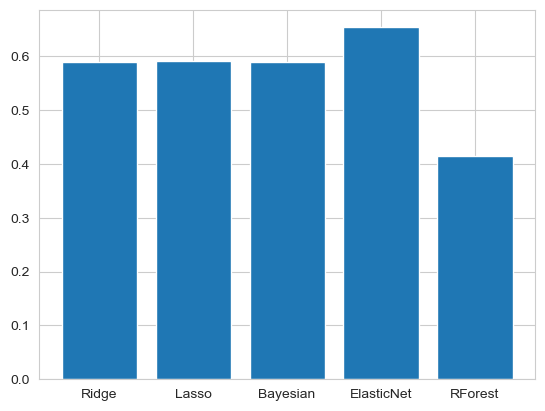

In [115]:
keys = RMSE_dict.keys()
values = RMSE_dict.values()

plt.bar(keys, values)

**Picking the model with lowest error rate RMSE is best, which in this case its Random Forest**

<BarContainer object of 2 artists>

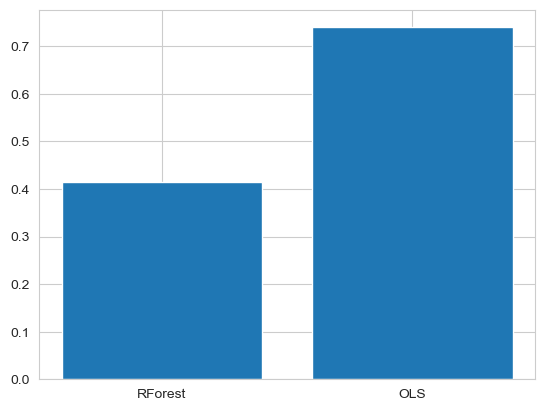

In [116]:
RMSE_compare = {
    "RForest": math.sqrt(m2_error(y_test, forest_test_pred)),
    "OLS": math.sqrt(m2_error(y_test, ols_test_pred))
}
RMSE_compare

keys = RMSE_compare.keys()
values = RMSE_compare.values()

plt.bar(keys, values)

**Comparing both RMSE the less is Random Forest, therefore its the best model to use for this project**

    Random forest adds additional randomness to the model while growing trees. When splitting a node, it searches for the best feature among a random subset of features instead of looking for the most important feature. Thus, it reduces the overfitting problem in decision trees and lessens the variance, improving accuracy.  The random forest technique can also handle big data with numerous variables running into thousands. It can automatically balance data sets when a class is more infrequent than other classes in the data.

**Why is random forest better than linear regression?**
    Linear Models have very few parameters, Random Forests a lot more. That means that Random Forests will overfit more easily than a Linear Regression.

## END